In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Rainfall_Weather_Forecasting.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

In [5]:
df['Sunshine'].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [6]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Month                     int64
Day                       int64
Year                      int64
dtype: object

In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,6,21,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,6,22,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,6,23,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,6,24,2017


In [8]:
df['Date'].value_counts()

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [9]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [10]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [11]:
df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [12]:
df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [13]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [14]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [15]:
df['Evaporation'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [16]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
Day                 0
Year                0
dtype: int64

In [17]:
df.shape

(8425, 26)

In [18]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Day', 'Year'],
      dtype='object')

In [19]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
Month              12
Day                31
Year               10
dtype: int64

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,6.442136,15.741958,2012.102433
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,3.437994,8.787354,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,3.000000,8.000000,2010.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,6.000000,16.000000,2011.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,9.000000,23.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,12.000000,31.000000,2017.000000


In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imp=SimpleImputer(strategy='most_frequent')

In [23]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
Month               0
Day                 0
Year                0
dtype: int64

In [25]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [26]:
imp1=SimpleImputer(strategy='mean')

In [27]:
for i in df.columns:
    if df[i].dtypes=='float64':
        df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
Year             0
dtype: int64

<AxesSubplot:>

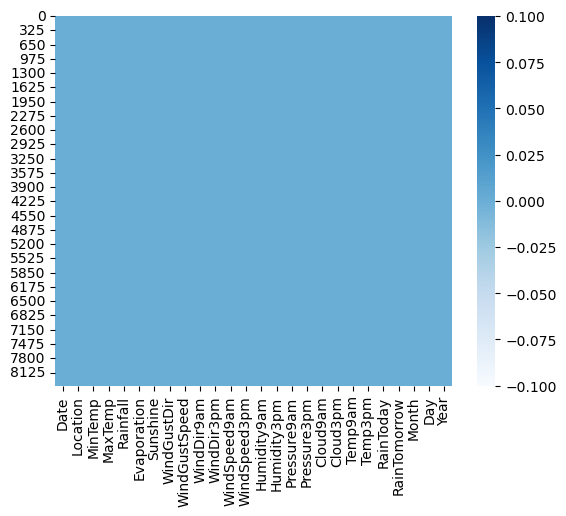

In [29]:
sns.heatmap(df.isnull(),cmap='Blues')

In [30]:
df['Date']=pd.to_datetime(df['Date'])

In [31]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Month                     int64
Day                       int64
Year                      int64
dtype: object

In [32]:
#Visualization

<AxesSubplot:xlabel='Location', ylabel='count'>

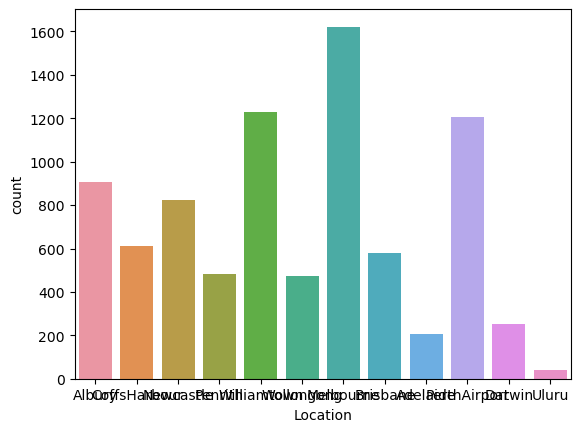

In [33]:
sns.countplot(df['Location'])

In [34]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

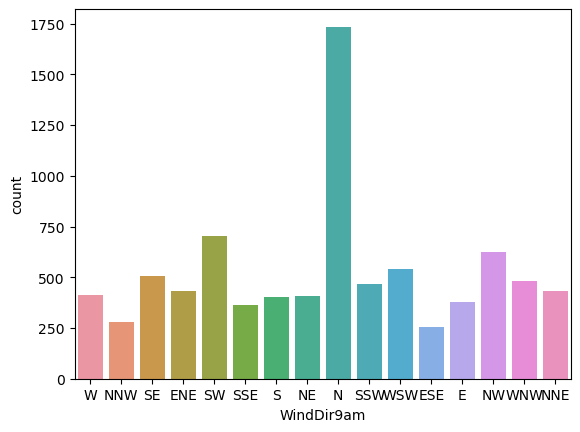

In [35]:
sns.countplot(df['WindDir9am'])

In [36]:
#Most of the time direction of wind at 9am is North

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

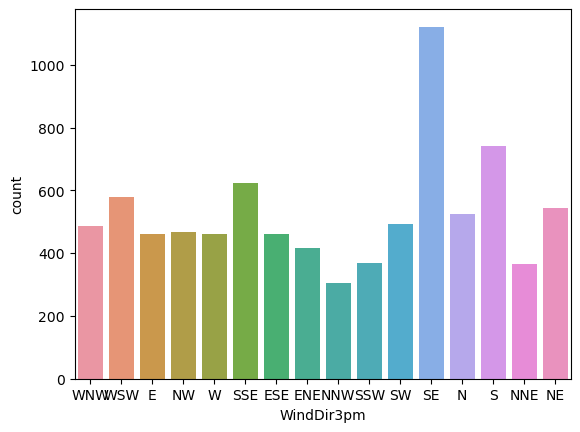

In [37]:
sns.countplot(df['WindDir3pm'])

In [38]:
#Most of the time direction of wind at 3pm is SE

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

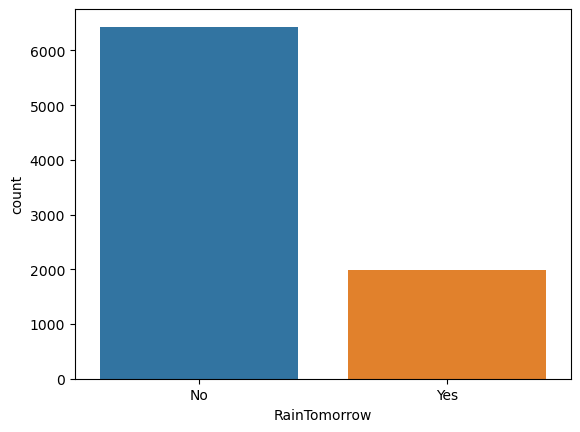

In [39]:
sns.countplot(df['RainTomorrow'])

In [40]:
#Most of the time it doesnot rain next day

<AxesSubplot:xlabel='Cloud9am', ylabel='count'>

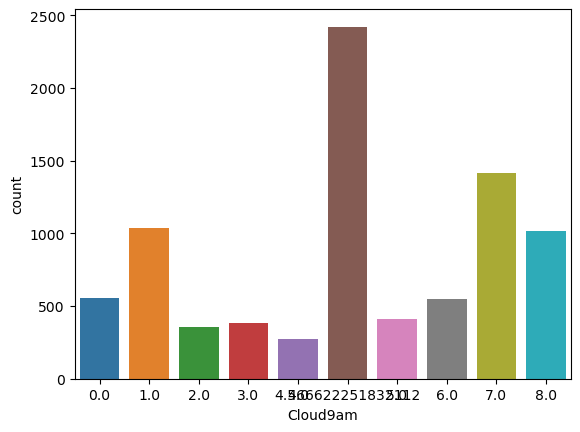

In [41]:
sns.countplot(df['Cloud9am'])

In [42]:
df['Cloud9am'].value_counts()

4.566622    2421
7.000000    1418
1.000000    1038
8.000000    1015
0.000000     554
6.000000     551
5.000000     414
3.000000     384
2.000000     357
4.000000     273
Name: Cloud9am, dtype: int64

In [43]:
df['Cloud3pm'].value_counts()

4.503183    2455
7.000000    1294
1.000000    1077
8.000000     863
6.000000     597
5.000000     522
2.000000     508
3.000000     411
4.000000     351
0.000000     347
Name: Cloud3pm, dtype: int64

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

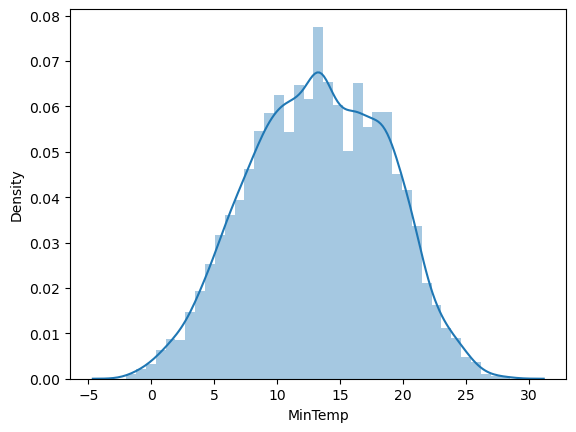

In [44]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

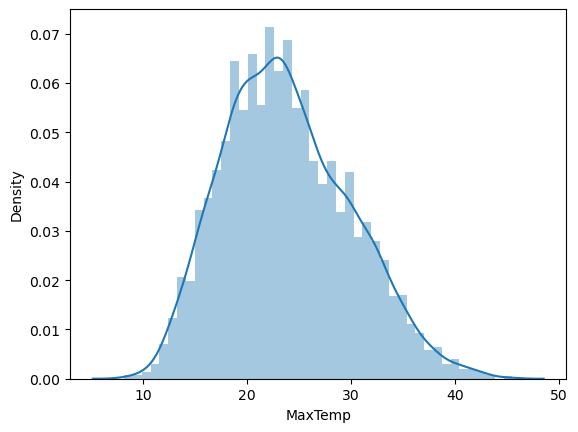

In [45]:
sns.distplot(df['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

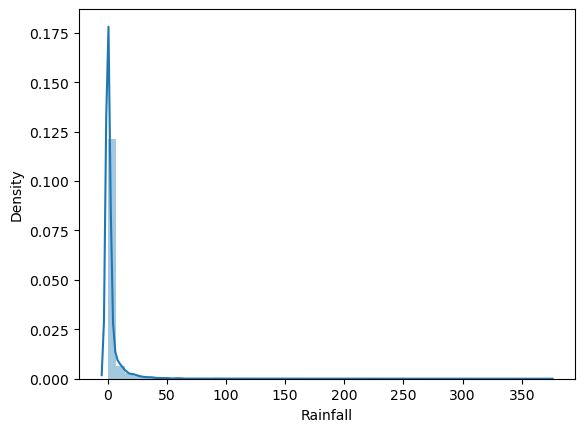

In [46]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

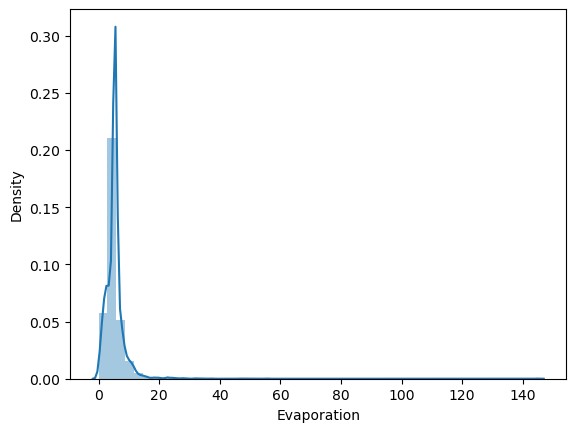

In [47]:
sns.distplot(df['Evaporation'])

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

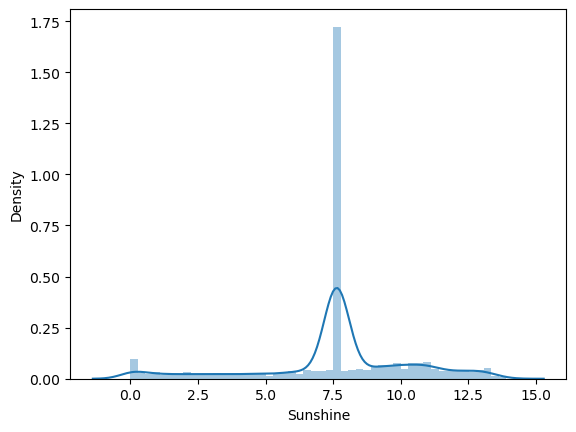

In [48]:
sns.distplot(df['Sunshine'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

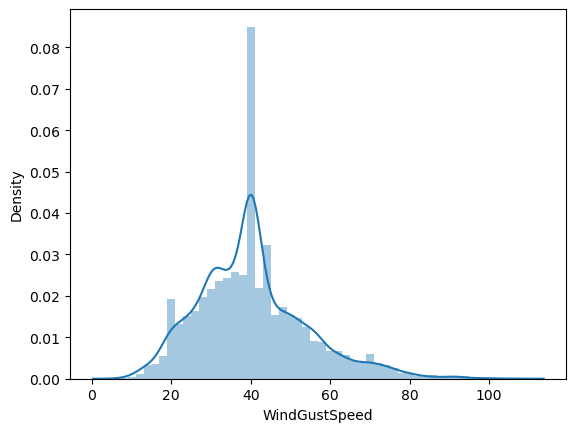

In [49]:
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

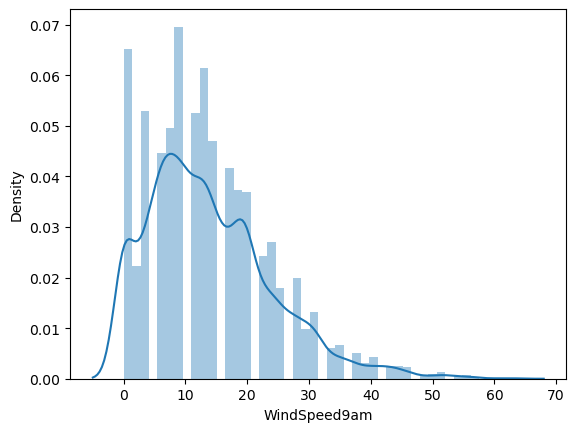

In [50]:
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

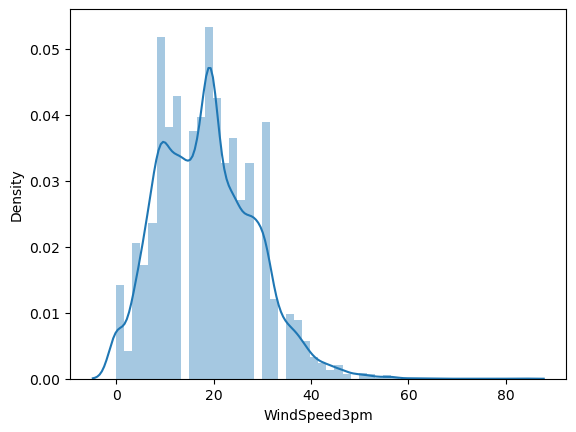

In [51]:
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

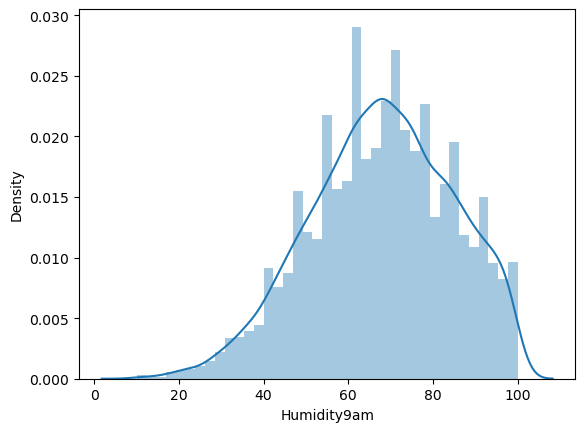

In [52]:
sns.distplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

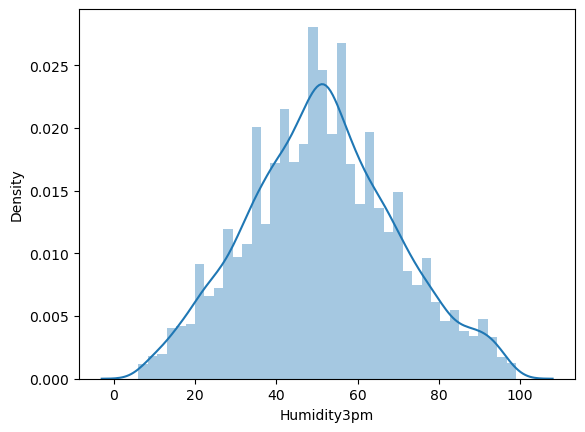

In [53]:
sns.distplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

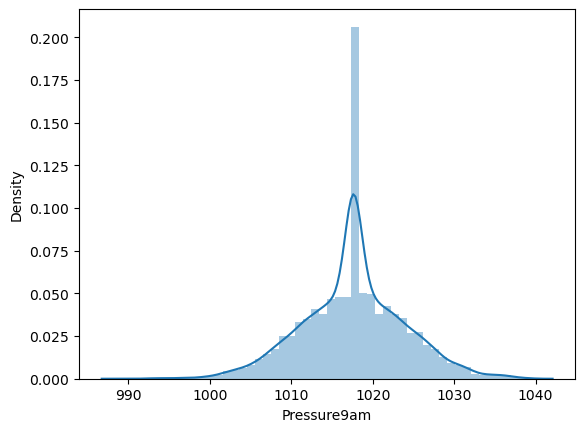

In [54]:
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

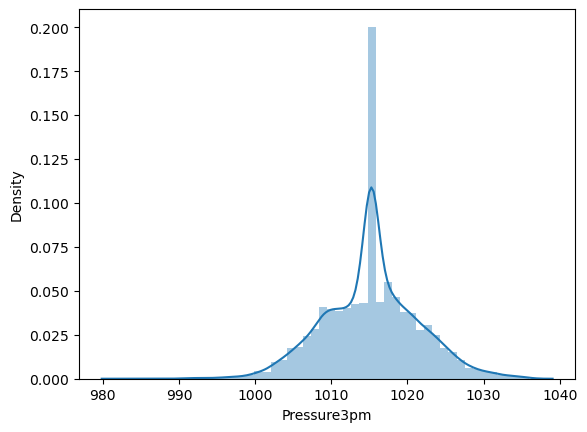

In [55]:
sns.distplot(df['Pressure3pm'])

In [56]:
df['Temp9am']

0       16.9
1       17.2
2       21.0
3       18.1
4       17.8
        ... 
8420    10.1
8421    10.9
8422    12.5
8423    15.1
8424    15.0
Name: Temp9am, Length: 8425, dtype: float64

<AxesSubplot:xlabel='MinTemp'>

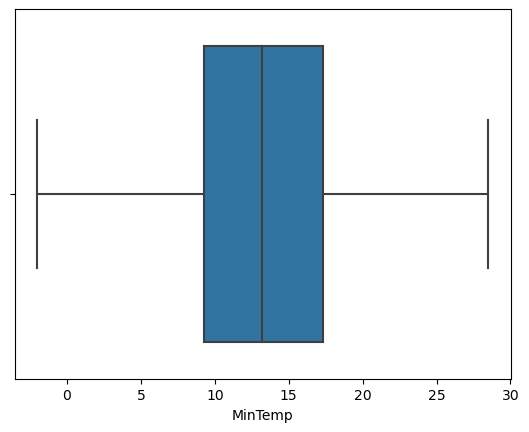

In [57]:
sns.boxplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp'>

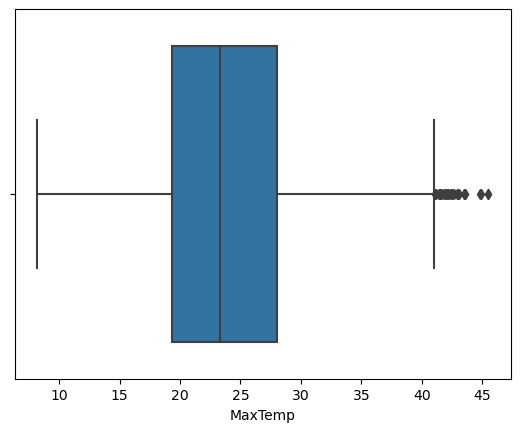

In [58]:
sns.boxplot(df['MaxTemp'])

<AxesSubplot:xlabel='Rainfall'>

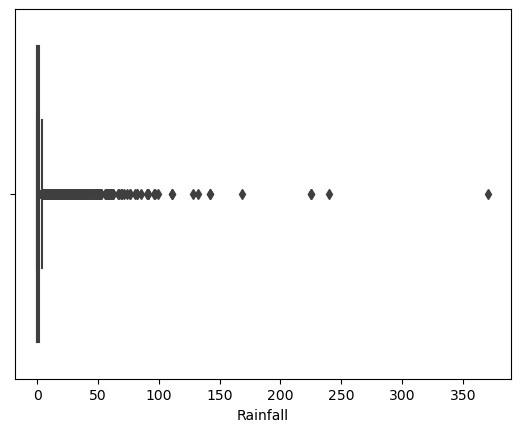

In [59]:
sns.boxplot(df['Rainfall'])

In [60]:
#There are lots of outliers in this column

<AxesSubplot:xlabel='Evaporation'>

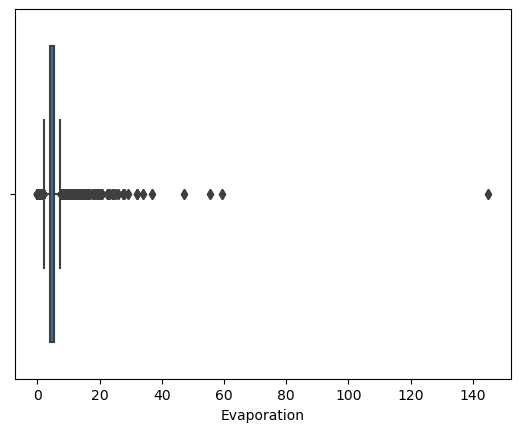

In [61]:
sns.boxplot(df['Evaporation'])

In [62]:
#There are of outliers in this column

<AxesSubplot:xlabel='Sunshine'>

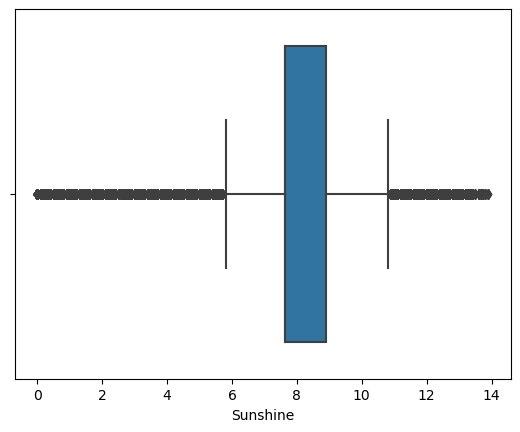

In [63]:
sns.boxplot(df['Sunshine'])

In [64]:
#There are lots of Outliers in this data

<AxesSubplot:xlabel='WindGustSpeed'>

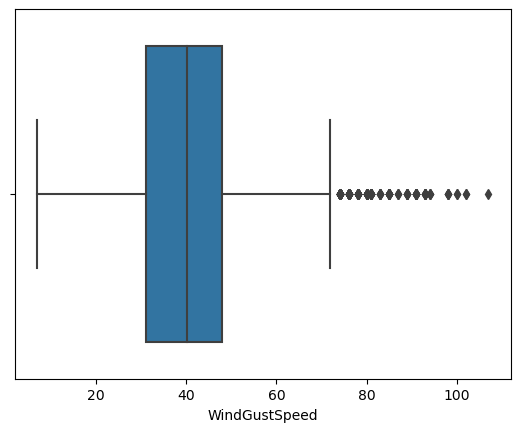

In [65]:
sns.boxplot(df['WindGustSpeed'])

In [66]:
#There are outliers in this column

<AxesSubplot:xlabel='WindSpeed9am'>

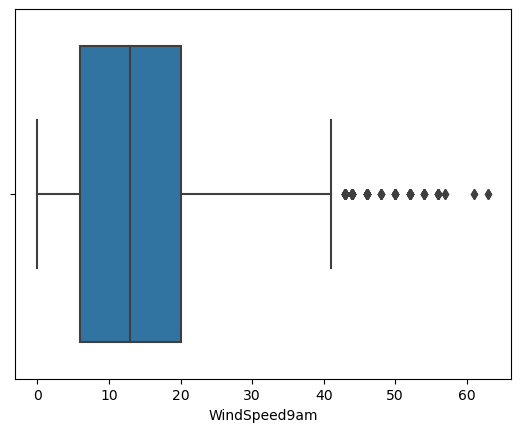

In [67]:
sns.boxplot(df['WindSpeed9am'])

In [68]:
#There are outliers in this data

<AxesSubplot:xlabel='WindSpeed3pm'>

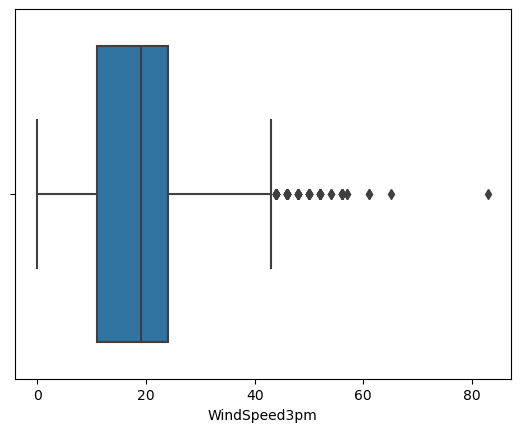

In [69]:
sns.boxplot(df['WindSpeed3pm'])

In [70]:
#There are outliers in this data

<AxesSubplot:xlabel='Humidity9am'>

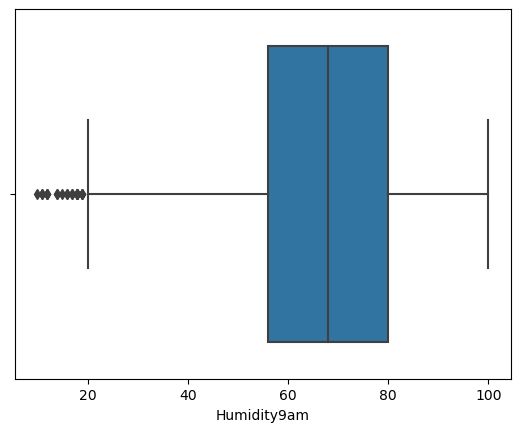

In [71]:
sns.boxplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm'>

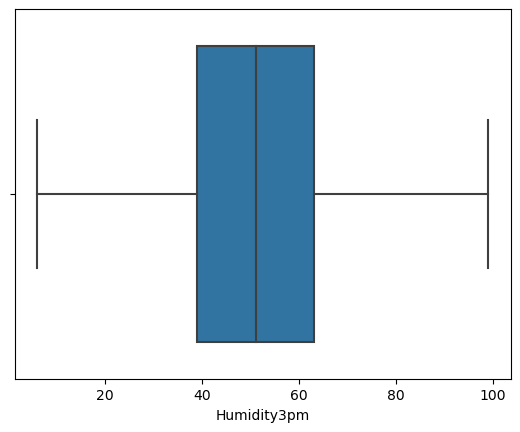

In [72]:
sns.boxplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am'>

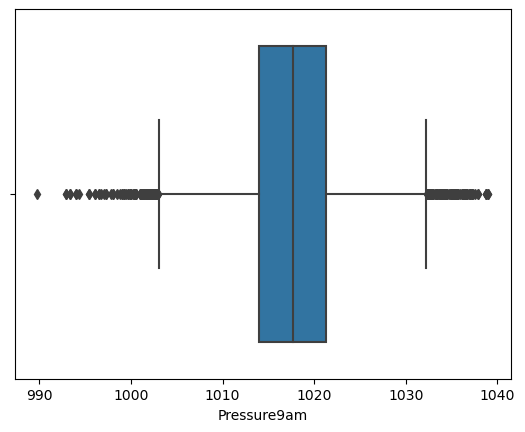

In [73]:
sns.boxplot(df['Pressure9am'])

In [74]:
#There are outliers in this column

<AxesSubplot:xlabel='Pressure3pm'>

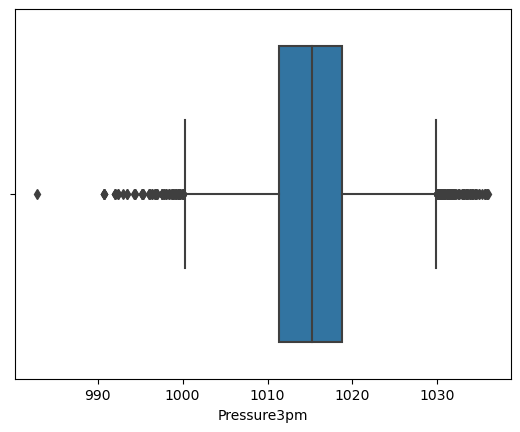

In [75]:
sns.boxplot(df['Pressure3pm'])

In [76]:
#There are outliers in this column

<AxesSubplot:xlabel='Temp9am'>

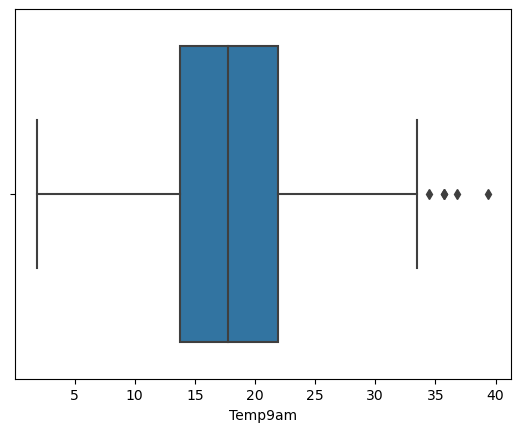

In [77]:
sns.boxplot(df['Temp9am'])

<AxesSubplot:xlabel='Temp3pm'>

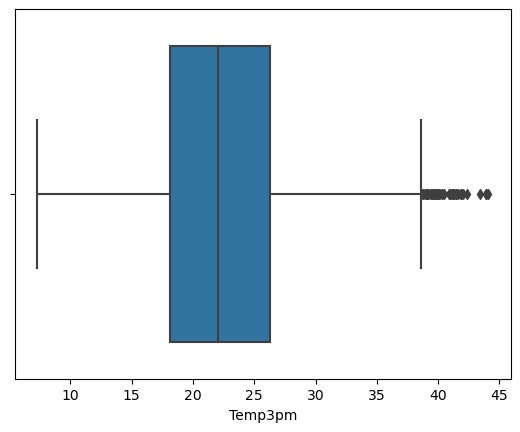

In [78]:
sns.boxplot(df['Temp3pm'])

In [79]:
df['Rainfall'].value_counts()

0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [80]:
df['Rainfall'].nunique()

251

In [81]:
df['RainToday']

0       No
1       No
2       No
3       No
4       No
        ..
8420    No
8421    No
8422    No
8423    No
8424    No
Name: RainToday, Length: 8425, dtype: object

<AxesSubplot:xlabel='MinTemp', ylabel='Location'>

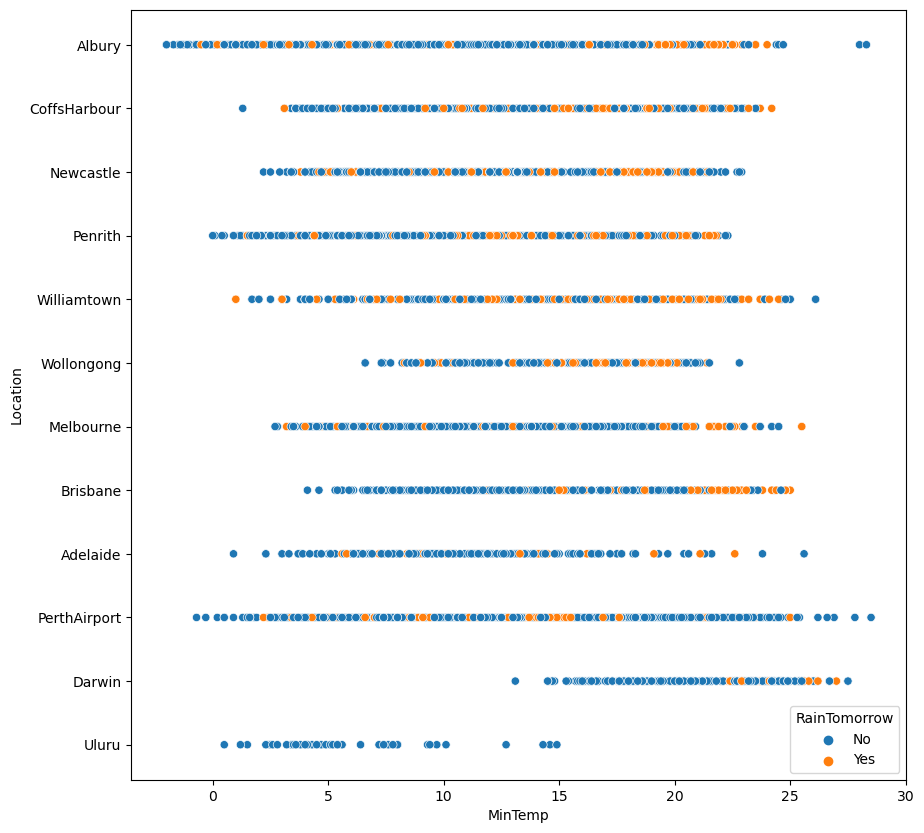

In [82]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='MinTemp',y='Location',hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

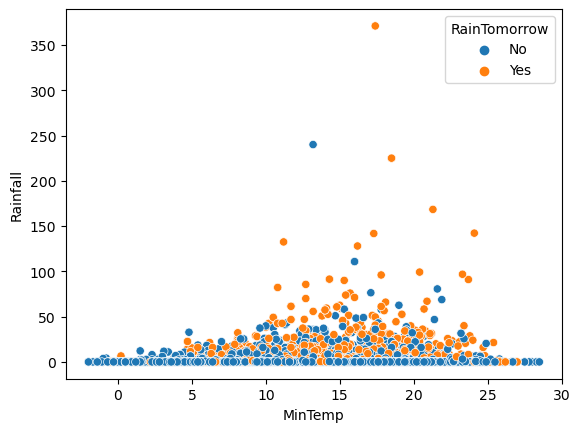

In [83]:
sns.scatterplot(x='MinTemp',y='Rainfall',hue='RainTomorrow',data=df)

In [84]:
#When min temo is between 8c to 22c then there are chances of rain on next day to happens, and the max amount of rainfall is recorded when temp is nearly 18c

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

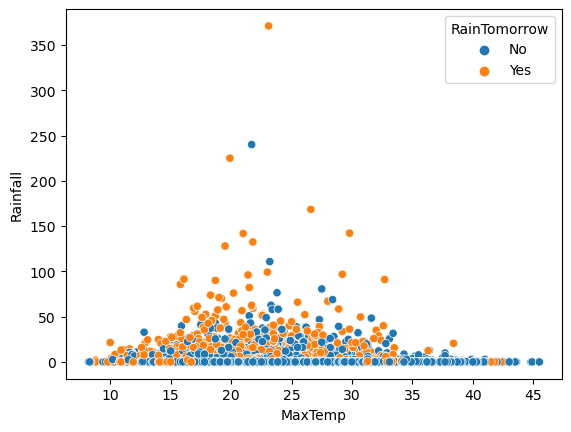

In [85]:
sns.scatterplot(x='MaxTemp',y='Rainfall',hue='RainTomorrow',data=df)

In [86]:
#When temp is netween 12 to 28 rain happened many times and Maximum amout of rainfall is recorded when temp is nearly 22

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

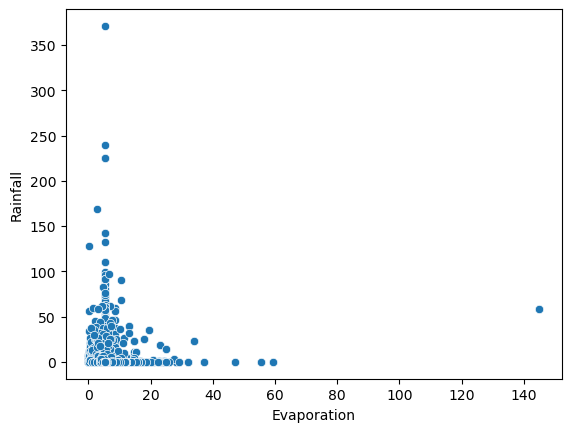

In [87]:
sns.scatterplot(x='Evaporation',y='Rainfall',data=df)

In [88]:
#With increase in Evaporation, Rainfall amount decreases

<AxesSubplot:xlabel='Evaporation', ylabel='Humidity9am'>

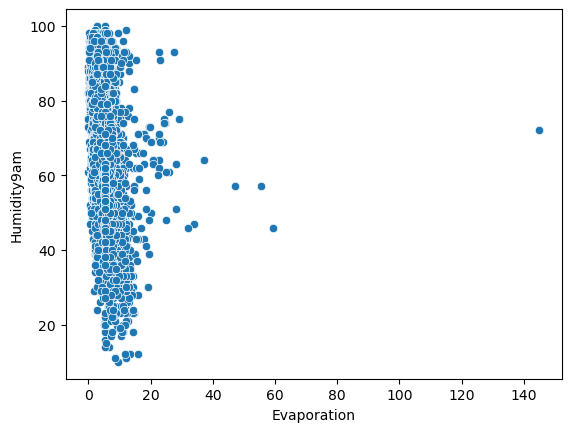

In [89]:
sns.scatterplot(x='Evaporation',y='Humidity9am',data=df)

In [90]:
#With increase in Evaporation, Humidity in the air decreases

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

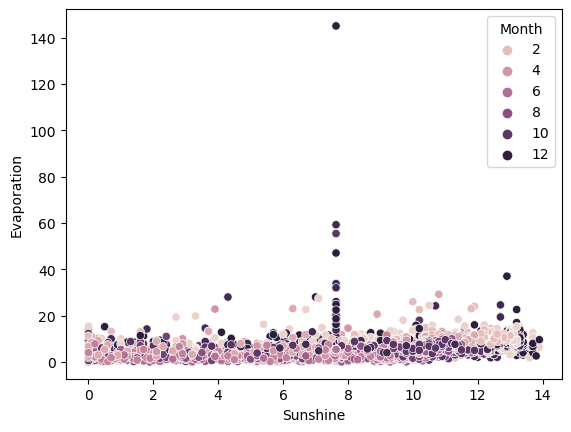

In [91]:
sns.scatterplot(x='Sunshine',y='Evaporation',hue='Month',data=df)

In [92]:
#Evaporation value is more in 7-8th month
#In almost all months evaporation is almost under 20
#With increase in sunshine evaporation is almost constant

<AxesSubplot:xlabel='Rainfall', ylabel='Month'>

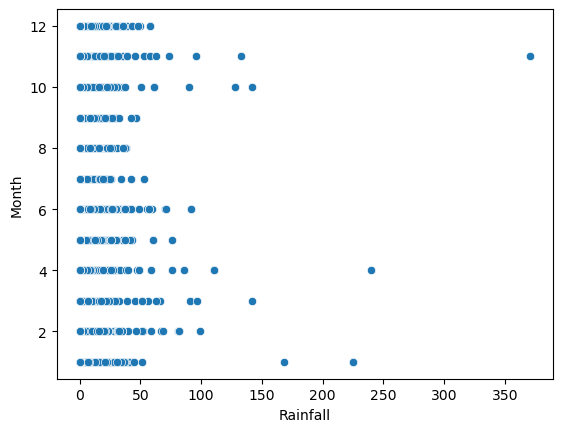

In [93]:
sns.scatterplot(x='Rainfall',y='Month',data=df)

In [94]:
#In almost all months Rainfall amount is more or less almost same

<AxesSubplot:xlabel='Rainfall', ylabel='Sunshine'>

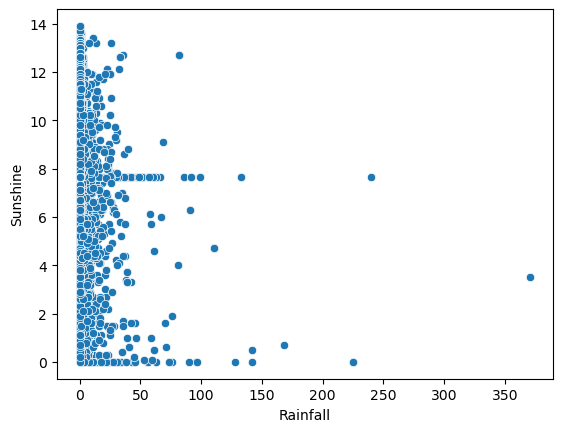

In [95]:
sns.scatterplot(x='Rainfall',y='Sunshine',data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

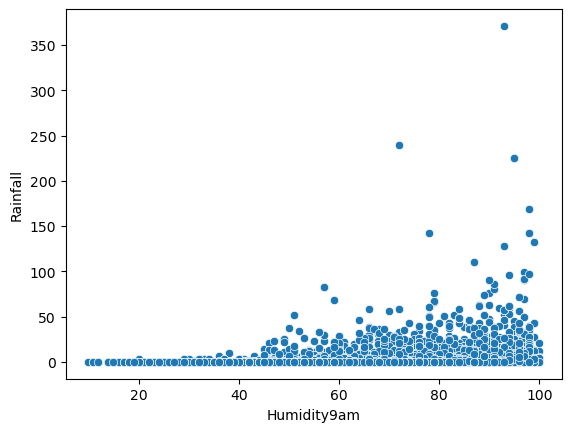

In [96]:
sns.scatterplot(x='Humidity9am',y='Rainfall',data=df)

In [97]:
#Rainfall is directly proportional to Humidity

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

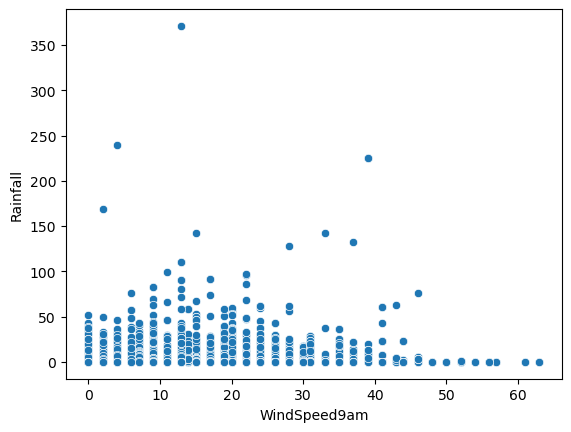

In [98]:
sns.scatterplot(x='WindSpeed9am',y='Rainfall',data=df)

In [99]:
#When wind speed is between 0-30 the amount of rainfall is almost constant
#But if windspeed is beyond 40 then there is drastic change in the amount of rainfall it's very less nearly zero

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

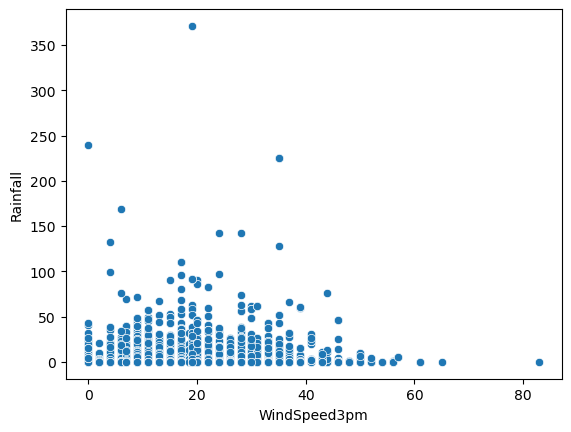

In [100]:
sns.scatterplot(x='WindSpeed3pm',y='Rainfall',data=df)

In [101]:
#Rainfall amount is maximum when Windspeed at 3pm is between 18-22 and beyond windspeed 50 Rainfall amount is almost 0

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

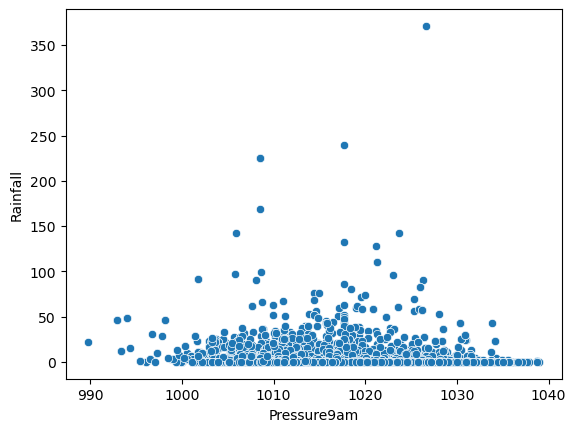

In [102]:
sns.scatterplot(x='Pressure9am',y='Rainfall',data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

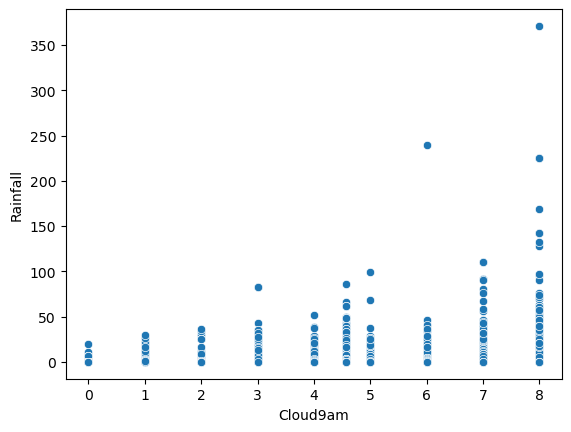

In [103]:
sns.scatterplot(x='Cloud9am',y='Rainfall',data=df)

In [104]:
#With increase in Cloud9am , Rainfall amount is also increasing

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

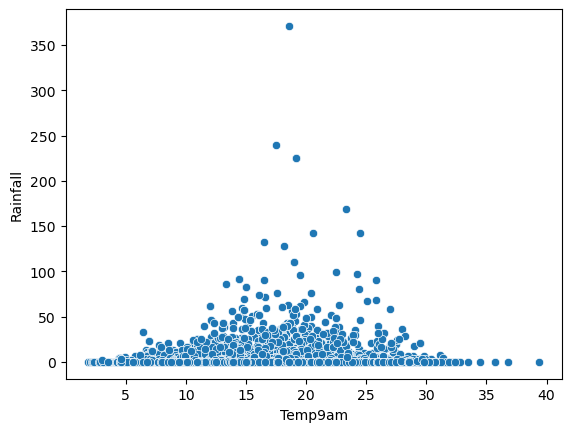

In [105]:
sns.scatterplot(x='Temp9am',y='Rainfall',data=df)

In [106]:
#With Increase in temp , Rainfall amount is decreasing

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

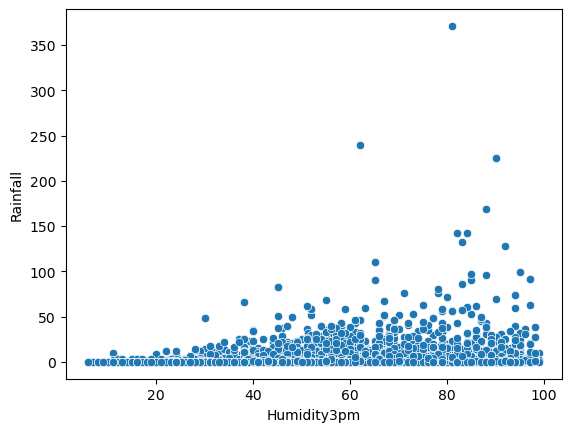

In [107]:
sns.scatterplot(x='Humidity3pm',y='Rainfall',data=df)

In [108]:
#With Increase in Humidity , Rainfall is also increasing

<AxesSubplot:xlabel='Temp9am', ylabel='Sunshine'>

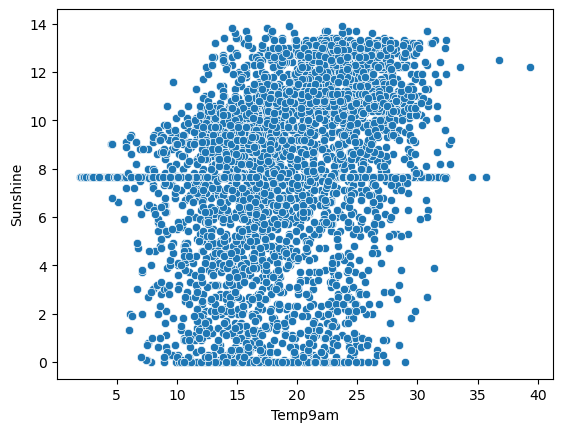

In [109]:
sns.scatterplot(x='Temp9am',y='Sunshine',data=df)

In [110]:
df.drop('Date',axis=1,inplace=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

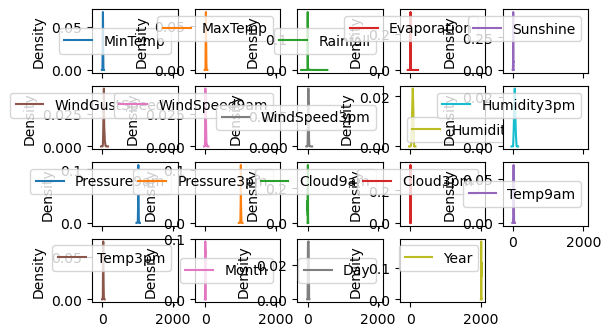

In [111]:
df.plot(kind='kde',subplots=True,layout=(5,5))

MinTemp             AxesSubplot(0.125,0.712609;0.133621x0.167391)
MaxTemp          AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Rainfall          AxesSubplot(0.44569,0.712609;0.133621x0.167391)
Evaporation      AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Sunshine         AxesSubplot(0.766379,0.712609;0.133621x0.167391)
WindGustSpeed       AxesSubplot(0.125,0.511739;0.133621x0.167391)
WindSpeed9am     AxesSubplot(0.285345,0.511739;0.133621x0.167391)
WindSpeed3pm      AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Humidity9am      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Humidity3pm      AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Pressure9am          AxesSubplot(0.125,0.31087;0.133621x0.167391)
Pressure3pm       AxesSubplot(0.285345,0.31087;0.133621x0.167391)
Cloud9am           AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Cloud3pm          AxesSubplot(0.606034,0.31087;0.133621x0.167391)
Temp9am           AxesSubplot(0.766379,0.31087;0.133621x0.167391)
Temp3pm   

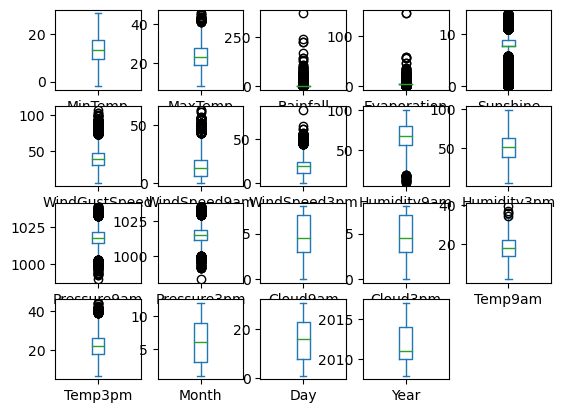

In [112]:
df.plot(kind='box',subplots=True,layout=(4,5))

In [113]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Month             0.039388
Day               0.004260
Year              0.418663
dtype: float64

In [114]:
from scipy.stats import boxcox

In [115]:
df['Rainfall']=np.sqrt(df['Rainfall'])

In [116]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall          2.880118
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Month             0.039388
Day               0.004260
Year              0.418663
dtype: float64

In [117]:
df['Rainfall']=np.cbrt(df['Rainfall'])

In [118]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall          0.840644
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Month             0.039388
Day               0.004260
Year              0.418663
dtype: float64

In [119]:
df['WindGustSpeed']=np.cbrt(df['WindGustSpeed'])

In [120]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall          0.840644
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed    -0.022921
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
Month             0.039388
Day               0.004260
Year              0.418663
dtype: float64

In [121]:
df['Evaporation']=np.cbrt(df['Evaporation'])

In [122]:
df.skew()

MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.840644
Evaporation      0.176211
Sunshine        -0.716525
WindGustSpeed   -0.022921
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
Month            0.039388
Day              0.004260
Year             0.418663
dtype: float64

In [123]:
df['WindSpeed9am']=np.sqrt(df['WindSpeed9am'])

In [124]:
df.skew()

MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.840644
Evaporation      0.176211
Sunshine        -0.716525
WindGustSpeed   -0.022921
WindSpeed9am    -0.414330
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
Month            0.039388
Day              0.004260
Year             0.418663
dtype: float64

In [125]:
from scipy.stats import zscore

In [126]:
z=np.abs(zscore(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Month','Day','Year']]))
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
0,0.038425,1.570089e-01,0.764101,0.184155,3.143679e-16,0.383597,0.700627,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,1.616696,1.677733,1.658896
1,1.076989,2.028121e-01,0.729937,0.184155,3.143679e-16,0.383597,0.881141,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,1.616696,1.563926,1.658896
2,0.054526,3.009450e-01,0.729937,0.184155,3.143679e-16,0.518289,0.628174,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,1.616696,1.450120,1.658896
3,0.742365,6.771214e-01,0.729937,0.184155,3.143679e-16,1.267087,0.038714,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,1.616696,1.336313,1.658896
4,0.800625,1.380408e+00,0.896872,0.184155,3.143679e-16,0.173684,0.467965,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,1.616696,1.222506,1.658896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.729937,0.184155,3.143679e-16,0.610540,0.146153,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.128611,0.598400,1.980423
8421,1.783418,2.355231e-01,0.729937,0.184155,3.143679e-16,1.477841,0.146153,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.128611,0.712207,1.980423
8422,1.448794,4.972110e-01,0.729937,0.184155,3.143679e-16,0.122781,0.241303,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.128611,0.826013,1.980423
8423,1.002628,5.135665e-01,0.729937,0.184155,3.143679e-16,0.878370,0.146153,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.128611,0.939820,1.980423


In [127]:
threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
         407,  568,  568,  569,  602,  683,  683,  748,  748, 1008, 1149,
        1189, 1387, 1413, 1467, 1480, 1587, 1644, 1665, 1898, 2028, 2043,
        2201, 2219, 2230, 2346, 2373, 2389, 2527, 2527, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2891,
        2897, 2900, 2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967,
        2975, 2989, 3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099,
        3101, 3139, 3141, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3206,
        3212, 3212, 3213, 3221, 3227, 3248, 3260, 3271, 3278, 3278, 3291,
        3291, 3302, 3302, 3303, 3449, 3449, 3450, 3458, 3471, 3617, 3687,
        3701, 3707, 3711, 3715, 3721, 3729, 3735, 3743, 3749, 3752, 3757,
        3763, 3771, 3785, 3791, 3799, 3805, 3813, 3819, 3827, 3841, 3903,
        3910, 3911, 3911, 3912, 3919, 

In [128]:
df_new=df[(z<3).all(axis=1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,Albury,13.4,22.900000,0.918386,1.753261,7.632205,W,3.530348,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.100000,0.000000,1.753261,7.632205,WNW,3.530348,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.700000,0.000000,1.753261,7.632205,WSW,3.583048,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.000000,0.000000,1.753261,7.632205,NE,2.884499,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.300000,1.000000,1.753261,7.632205,W,3.448217,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.000000,1.753261,7.632205,E,3.141381,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,6,21,2017
8421,Uluru,3.6,25.300000,0.000000,1.753261,7.632205,NNW,2.802039,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,6,22,2017
8422,Uluru,5.4,26.900000,0.000000,1.753261,7.632205,N,3.332222,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,6,23,2017
8423,Uluru,7.8,27.000000,0.000000,1.753261,7.632205,SE,3.036589,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,6,24,2017


In [129]:
df_new.cor=df_new.corr()
df_new.cor

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
MinTemp,1.000000,0.715441,0.083326,0.361762,0.052937,0.248863,0.169311,0.181627,-0.116547,0.094279,-0.428522,-0.422075,0.095032,0.043735,0.886901,0.683299,-0.246217,0.012012,0.035186
MaxTemp,0.715441,1.000000,-0.240120,0.457890,0.376431,0.150659,0.031481,0.089605,-0.378871,-0.408651,-0.326277,-0.406601,-0.252110,-0.245819,0.864172,0.974048,-0.162759,0.020144,0.112772
Rainfall,0.083326,-0.240120,1.000000,-0.179862,-0.277576,0.087438,0.024812,0.029828,0.429969,0.402789,-0.119112,-0.037599,0.322368,0.276285,-0.104590,-0.250805,0.011426,-0.022399,0.029097
Evaporation,0.361762,0.457890,-0.179862,1.000000,0.360936,0.173934,0.061600,0.082826,-0.294609,-0.213077,-0.248306,-0.261494,-0.099430,-0.128939,0.427686,0.444334,-0.046028,0.013589,0.143281
Sunshine,0.052937,0.376431,-0.277576,0.360936,1.000000,0.006411,-0.011485,0.039859,-0.362143,-0.438608,0.013279,-0.045770,-0.530367,-0.543381,0.248191,0.394252,-0.005183,0.004466,0.059664
WindGustSpeed,0.248863,0.150659,0.087438,0.173934,0.006411,1.000000,0.525743,0.636499,-0.280095,-0.090431,-0.379671,-0.337546,0.013666,0.070634,0.219765,0.114322,0.048695,0.000963,-0.027252
WindSpeed9am,0.169311,0.031481,0.024812,0.061600,-0.011485,0.525743,1.000000,0.550183,-0.369279,-0.097088,-0.157588,-0.119122,-0.002281,0.047650,0.144913,0.013809,0.034907,-0.008731,-0.111415
WindSpeed3pm,0.181627,0.089605,0.029828,0.082826,0.039859,0.636499,0.550183,1.000000,-0.250635,-0.087090,-0.235299,-0.184568,0.006118,0.003749,0.185745,0.067590,0.039185,-0.006101,-0.065196
Humidity9am,-0.116547,-0.378871,0.429969,-0.294609,-0.362143,-0.280095,-0.369279,-0.250635,1.000000,0.631106,0.134081,0.166316,0.408351,0.298298,-0.362940,-0.372001,-0.116439,0.002347,0.109462
Humidity3pm,0.094279,-0.408651,0.402789,-0.213077,-0.438608,-0.090431,-0.097088,-0.087090,0.631106,1.000000,-0.006304,0.064095,0.421984,0.439525,-0.113293,-0.479207,-0.074363,0.012597,-0.023911


<AxesSubplot:>

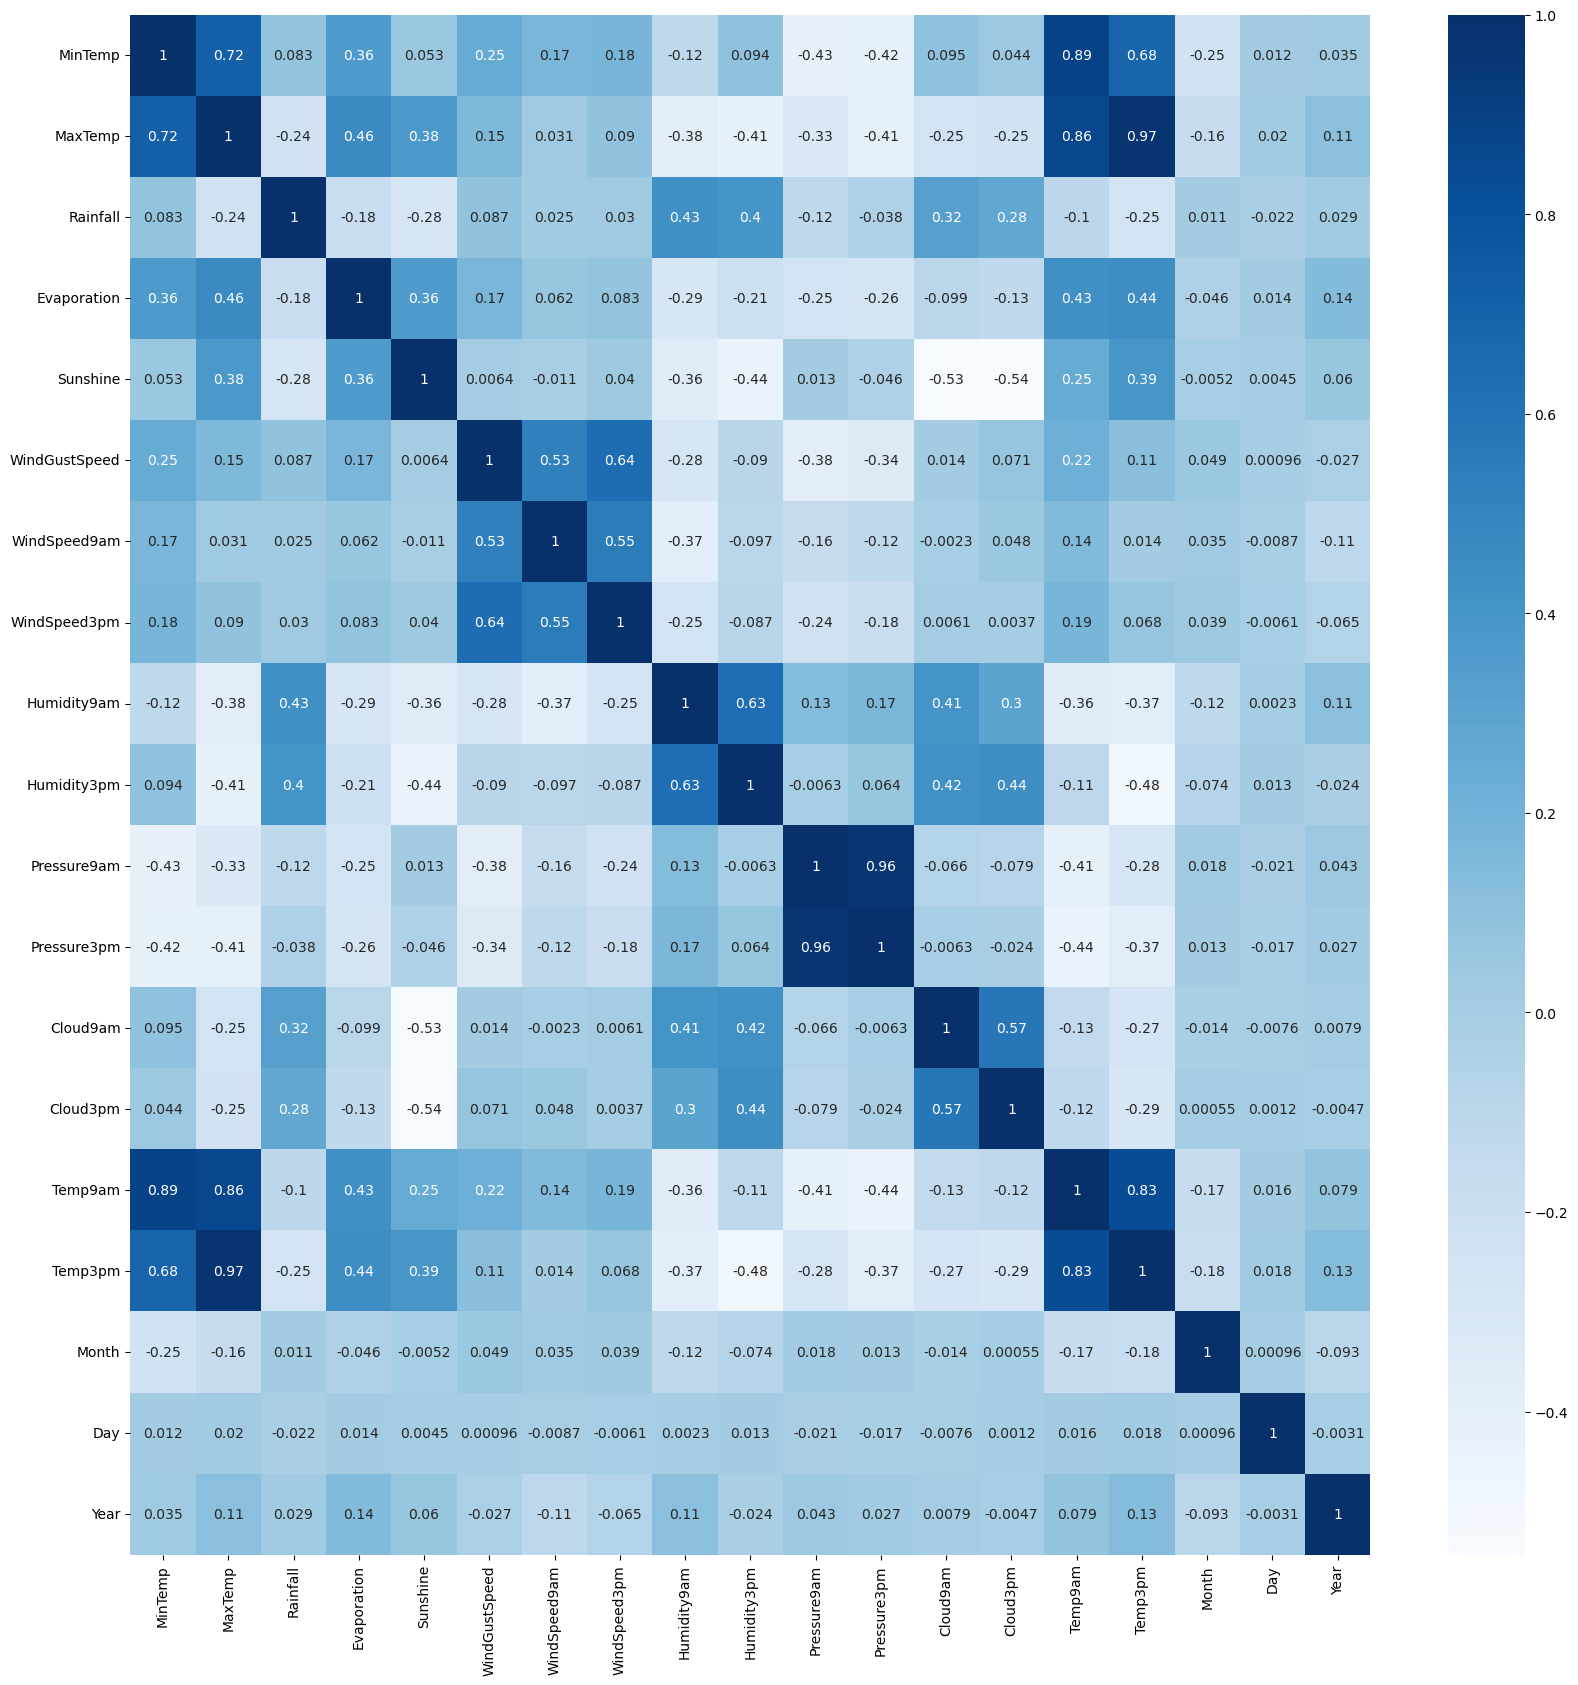

In [130]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.cor,annot=True,cmap='Blues')

In [131]:
df_new.shape

(8144, 25)

In [132]:
df.shape

(8425, 25)

In [133]:
loss=(df.shape[0]-df_new.shape[0])/df.shape[0]

In [134]:
loss*100

3.335311572700297

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=le.fit_transform(df_new[i])

In [137]:
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,1,13.4,22.900000,0.918386,1.753261,7.632205,13,3.530348,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.100000,0.000000,1.753261,7.632205,14,3.530348,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.700000,0.000000,1.753261,7.632205,15,3.583048,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.000000,0.000000,1.753261,7.632205,4,2.884499,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.300000,1.000000,1.753261,7.632205,13,3.448217,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.753261,7.632205,0,3.141381,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,6,21,2017
8421,9,3.6,25.300000,0.000000,1.753261,7.632205,6,2.802039,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,6,22,2017
8422,9,5.4,26.900000,0.000000,1.753261,7.632205,3,3.332222,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,6,23,2017
8423,9,7.8,27.000000,0.000000,1.753261,7.632205,9,3.036589,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,6,24,2017


In [138]:
#Now Separating the Feature and Target

In [139]:
x=df_new.drop('RainTomorrow',axis=1)

In [140]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Day,Year
0,1,13.4,22.900000,0.918386,1.753261,7.632205,13,3.530348,13,14,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,12,1,2008
1,1,7.4,25.100000,0.000000,1.753261,7.632205,14,3.530348,6,15,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,12,2,2008
2,1,12.9,25.700000,0.000000,1.753261,7.632205,15,3.583048,13,15,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,12,3,2008
3,1,9.2,28.000000,0.000000,1.753261,7.632205,4,2.884499,9,0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,12,4,2008
4,1,17.5,32.300000,1.000000,1.753261,7.632205,13,3.448217,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.753261,7.632205,0,3.141381,9,1,...,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,6,21,2017
8421,9,3.6,25.300000,0.000000,1.753261,7.632205,6,2.802039,9,3,...,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,6,22,2017
8422,9,5.4,26.900000,0.000000,1.753261,7.632205,3,3.332222,9,14,...,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,6,23,2017
8423,9,7.8,27.000000,0.000000,1.753261,7.632205,9,3.036589,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,6,24,2017


In [141]:
y=df_new['RainTomorrow']

In [142]:
y.shape

(8144,)

In [143]:
x.shape

(8144, 24)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler=StandardScaler()

In [146]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif=pd.DataFrame()

In [149]:
vif['Values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Values,Features
0,1.576141,Location
1,8.703676,MinTemp
2,25.665973,MaxTemp
3,3.856688,Rainfall
4,1.512901,Evaporation
5,1.941757,Sunshine
6,1.615577,WindGustDir
7,2.287891,WindGustSpeed
8,1.383575,WindDir9am
9,1.492703,WindDir3pm


<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

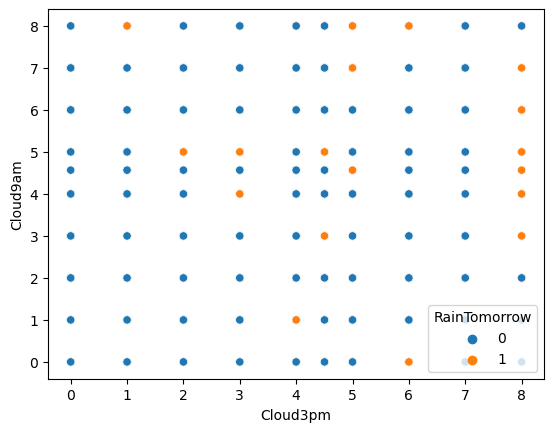

In [150]:
sns.scatterplot(x='Cloud3pm',y='Cloud9am',hue='RainTomorrow',data=df_new)

In [151]:
x=x.drop(['Temp3pm','Temp9am'],axis=1)

In [152]:
x.shape

(8144, 22)

In [153]:
y.shape

(8144,)

In [154]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Values,Features
0,1.573534,Location
1,4.721603,MinTemp
2,5.620565,MaxTemp
3,3.853316,Rainfall
4,1.504221,Evaporation
5,1.934530,Sunshine
6,1.611003,WindGustDir
7,2.232254,WindGustSpeed
8,1.382988,WindDir9am
9,1.490243,WindDir3pm


In [155]:
x=x.drop('Pressure9am',axis=1)

In [156]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,Month,Day,Year
0,-1.509752,0.042217,-0.153786,0.773852,0.228695,-0.007605,1.232289,0.408807,1.249402,1.399887,...,0.610289,0.188588,-1.614135,-1.381400,1.412413,0.001357,-0.553709,1.625492,-1.671898,-1.657902
1,-1.509752,-1.076742,0.213399,-0.728778,0.228695,-0.007605,1.444924,0.408807,-0.276922,1.625956,...,0.396545,-1.438739,-1.449156,-1.263511,0.000818,0.001357,-0.553709,1.625492,-1.558279,-1.657902
2,-1.509752,-0.051029,0.313541,-0.728778,0.228695,-0.007605,1.657559,0.546486,1.249402,1.625956,...,0.824033,-1.800367,-1.174190,-1.111940,0.000818,-1.087694,-0.553709,1.625492,-1.444659,-1.657902
3,-1.509752,-0.741054,0.697417,-0.728778,0.228695,-0.007605,-0.681431,-1.278489,0.377217,-1.765084,...,-0.992794,-1.378467,-1.944093,-0.421449,0.000818,0.001357,-0.553709,1.625492,-1.331040,-1.657902
4,-1.509752,0.806839,1.415098,0.907386,0.228695,-0.007605,1.232289,0.194237,-1.367154,-0.182599,...,0.182800,0.851574,-1.009211,-1.566654,1.001274,1.522706,-0.553709,1.625492,-1.217420,-1.657902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,1.028133,-1.934610,-0.070335,-0.728778,0.228695,-0.007605,-1.531973,-0.607380,0.377217,-1.539015,...,-0.779049,-1.016839,-1.504149,0.841645,0.000818,0.001357,-0.553709,-0.122984,0.600493,2.002376
8140,1.028133,-1.785416,0.246780,-0.728778,0.228695,-0.007605,-0.256160,-1.493917,0.377217,-1.086876,...,-0.992794,-0.715482,-1.669128,0.639550,0.000818,0.001357,-0.553709,-0.122984,0.714112,2.002376
8141,1.028133,-1.449728,0.513824,-0.728778,0.228695,-0.007605,-0.894066,-0.108803,0.377217,1.399887,...,-0.992794,-0.896296,-1.504149,0.252201,0.000818,0.001357,-0.553709,-0.122984,0.827732,2.002376
8142,1.028133,-1.002145,0.530514,-0.728778,0.228695,-0.007605,0.381747,-0.881151,0.595263,-1.086876,...,-1.206538,-1.016839,-1.504149,0.201678,-0.643281,-1.087694,-0.553709,-0.122984,0.941351,2.002376


In [157]:
x.shape

(8144, 21)

In [158]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Values,Features
0,1.573399,Location
1,4.508480,MinTemp
2,5.367565,MaxTemp
3,3.833136,Rainfall
4,1.488761,Evaporation
5,1.930654,Sunshine
6,1.595450,WindGustDir
7,2.213646,WindGustSpeed
8,1.359505,WindDir9am
9,1.421130,WindDir3pm


In [159]:
y.value_counts()

0    6233
1    1911
Name: RainTomorrow, dtype: int64

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
SM=SMOTE()

In [162]:
x1,y1=SM.fit_resample(x,y)

In [163]:
y1.value_counts()

0    6233
1    6233
Name: RainTomorrow, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC

In [166]:
MaxRS=0
MaxAcc=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    MaxAcc=acc
    MaxRS=i

In [167]:
print('MaxAcc=',acc,'MaxRS=',MaxRS)

MaxAcc= 0.7724598930481283 MaxRS= 199


In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [169]:
LR=LogisticRegression()
LR.fit(x_test,y_test)
predLR=LR.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

Accuracy Score= 0.8428805237315876
[[1758  116]
 [ 268  302]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1874
           1       0.72      0.53      0.61       570

    accuracy                           0.84      2444
   macro avg       0.80      0.73      0.76      2444
weighted avg       0.83      0.84      0.83      2444



In [170]:
RFC=RandomForestClassifier()
RFC.fit(x_test,y_test)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[1874    0]
 [   0  570]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      1.00      1.00       570

    accuracy                           1.00      2444
   macro avg       1.00      1.00      1.00      2444
weighted avg       1.00      1.00      1.00      2444



In [171]:
ETC=ExtraTreesClassifier()
ETC.fit(x_test,y_test)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

1.0
[[1874    0]
 [   0  570]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      1.00      1.00       570

    accuracy                           1.00      2444
   macro avg       1.00      1.00      1.00      2444
weighted avg       1.00      1.00      1.00      2444



In [172]:
GBC=GradientBoostingClassifier()
GBC.fit(x_test,y_test)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.9013911620294599
[[1827   47]
 [ 194  376]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1874
           1       0.89      0.66      0.76       570

    accuracy                           0.90      2444
   macro avg       0.90      0.82      0.85      2444
weighted avg       0.90      0.90      0.90      2444



In [173]:
ADA=AdaBoostClassifier()
ADA.fit(x_test,y_test)
predADA=ADA.predict(x_test)
print(accuracy_score(y_test,predADA))
print(confusion_matrix(y_test,predADA))
print(classification_report(y_test,predADA))

0.8576104746317512
[[1770  104]
 [ 244  326]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1874
           1       0.76      0.57      0.65       570

    accuracy                           0.86      2444
   macro avg       0.82      0.76      0.78      2444
weighted avg       0.85      0.86      0.85      2444



In [174]:
BC=BaggingClassifier()
BC.fit(x_test,y_test)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9852700490998363
[[1871    3]
 [  33  537]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1874
           1       0.99      0.94      0.97       570

    accuracy                           0.99      2444
   macro avg       0.99      0.97      0.98      2444
weighted avg       0.99      0.99      0.99      2444



In [175]:
svc=SVC()
svc.fit(x_test,y_test)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8993453355155483
[[1834   40]
 [ 206  364]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1874
           1       0.90      0.64      0.75       570

    accuracy                           0.90      2444
   macro avg       0.90      0.81      0.84      2444
weighted avg       0.90      0.90      0.89      2444



In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
cv=5
cv_score=cross_val_score(LR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Differnece between cv score and accuracy score:",(accuracy_score(y_test,predLR))-(cv_score.mean()))

[0.85942296 0.79189687 0.8004911  0.81399632 0.8544226 ]
0.82404596962608
Differnece between cv score and accuracy score: 0.018834554105507606


In [178]:
cv=5
cv_score=cross_val_score(RFC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predRFC)-(cv_score.mean())))

[0.84468999 0.84346225 0.86249233 0.80294659 0.85135135]
0.8409885023144692
Difference between cv score and accuracy score: 0.1590114976855308


In [179]:
cv=5
cv_score=cross_val_score(ETC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predETC)-(cv_score.mean())))

[0.84898711 0.83364027 0.8747698  0.81092695 0.83046683]
0.8397581911394066
Difference between cv score and accuracy score: 0.16024180886059336


In [180]:
cv=5
cv_score=cross_val_score(GBC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predGBC)-(cv_score.mean())))

[0.84653161 0.80356047 0.80662983 0.71884592 0.84889435]
0.804892436384149
Difference between cv score and accuracy score: 0.09649872564531092


In [181]:
cv=5
cv_score=cross_val_score(ADA,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predADA)-(cv_score.mean())))

[0.82995703 0.79251074 0.7679558  0.78207489 0.8507371 ]
0.8046471132106492
Difference between cv score and accuracy score: 0.05296336142110203


In [182]:
cv=5
cv_score=cross_val_score(BC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predBC)-(cv_score.mean())))

[0.82750153 0.83364027 0.86126458 0.77777778 0.83476658]
0.82699014936584
Difference between cv score and accuracy score: 0.15827989973399625


In [183]:
cv=5
cv_score=cross_val_score(svc,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predsvc)-(cv_score.mean())))

[0.85205648 0.80662983 0.80662983 0.80785758 0.84459459]
0.823553664161399
Difference between cv score and accuracy score: 0.07579167135414933


In [184]:
#ETC have the highest accuracy and lowest difference between cross val score& accuracy score. So we are selecting ETC as the best fit model

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
parameters={'n_estimators':[1,4,7,10],
           'max_depth':[3],
           'bootstrap':[True],
           'random_state':[4,9,3,5],
           'warm_start':[True,False]}

In [187]:
gscv=GridSearchCV(ETC,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [3],
                         'n_estimators': [1, 4, 7, 10],
                         'random_state': [4, 9, 3, 5],
                         'warm_start': [True, False]})

In [188]:
gscv.best_params_

{'bootstrap': True,
 'max_depth': 3,
 'n_estimators': 1,
 'random_state': 3,
 'warm_start': True}

In [189]:
gscv.best_params_

{'bootstrap': True,
 'max_depth': 3,
 'n_estimators': 1,
 'random_state': 3,
 'warm_start': True}

In [190]:
Final_Model=ExtraTreesClassifier(bootstrap=True,max_depth=3,n_estimators=10,random_state=5,warm_start=True)
Final_Model.fit(x_train,y_train)
predF=Final_Model.predict(x_test)
acc=accuracy_score(y_test,predF)
print(acc*100)

78.31423895253683


In [191]:
import joblib
joblib.dump(Final_Model,'RainFall')

['RainFall']

In [192]:
model=joblib.load('RainFall')

In [193]:
predictions=model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,1,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [195]:
df1=pd.read_csv('Rainfall_Weather_Forecasting.csv')

In [196]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [197]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))
imp1=SimpleImputer(strategy='mean')
for i in df1.columns:
    if df1[i].dtypes=='float64':
        df1[i]=imp1.fit_transform(df1[i].values.reshape(-1,1))

In [198]:
df1.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [199]:
df1['Evaporation']=np.cbrt(df1['Evaporation'])

In [200]:
df1.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation       0.176211
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [201]:
df1['WindGustSpeed'].value_counts()

40.174469     991
39.000000     441
35.000000     435
37.000000     422
33.000000     408
31.000000     396
41.000000     371
30.000000     367
28.000000     332
43.000000     302
48.000000     292
26.000000     275
50.000000     259
46.000000     258
24.000000     255
52.000000     249
44.000000     241
22.000000     223
54.000000     210
20.000000     186
56.000000     153
57.000000     148
19.000000     137
61.000000     114
59.000000     113
63.000000      95
17.000000      92
65.000000      74
67.000000      64
72.000000      62
15.000000      58
13.000000      57
74.000000      54
70.000000      53
69.000000      49
76.000000      44
78.000000      23
80.000000      22
11.000000      18
85.000000      14
81.000000      13
91.000000      12
89.000000       7
93.000000       7
9.000000        6
83.000000       6
98.000000       4
94.000000       3
87.000000       3
102.000000      2
100.000000      2
7.000000        2
107.000000      1
Name: WindGustSpeed, dtype: int64

In [202]:
df1['WindGustSpeed']=np.cbrt(df1['WindGustSpeed'])

In [203]:
df1.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation       0.176211
Sunshine         -0.716525
WindGustSpeed    -0.022921
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [204]:
df1['WindSpeed9am']=np.sqrt(df1['WindSpeed9am'])

In [205]:
df1.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation       0.176211
Sunshine         -0.716525
WindGustSpeed    -0.022921
WindSpeed9am     -0.414330
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [206]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Day']=df1['Date'].apply(lambda x:x.day)
df1['Year']=df1['Date'].apply(lambda x:x.year)

In [207]:
from scipy.stats import zscore

In [208]:
z1=np.abs(zscore(df1[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Month','Day','Year']]))
z1

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
0,0.038425,1.570089e-01,0.184155,3.143679e-16,0.383597,0.700627,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,1.616696,1.677733,1.658896
1,1.076989,2.028121e-01,0.184155,3.143679e-16,0.383597,0.881141,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,1.616696,1.563926,1.658896
2,0.054526,3.009450e-01,0.184155,3.143679e-16,0.518289,0.628174,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,1.616696,1.450120,1.658896
3,0.742365,6.771214e-01,0.184155,3.143679e-16,1.267087,0.038714,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,1.616696,1.336313,1.658896
4,0.800625,1.380408e+00,0.184155,3.143679e-16,0.173684,0.467965,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,1.616696,1.222506,1.658896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.184155,3.143679e-16,0.610540,0.146153,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.128611,0.598400,1.980423
8421,1.783418,2.355231e-01,0.184155,3.143679e-16,1.477841,0.146153,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.128611,0.712207,1.980423
8422,1.448794,4.972110e-01,0.184155,3.143679e-16,0.122781,0.241303,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.128611,0.826013,1.980423
8423,1.002628,5.135665e-01,0.184155,3.143679e-16,0.878370,0.146153,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.128611,0.939820,1.980423


In [209]:
threshold=3
np.where(z1>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
         407,  568,  568,  569,  602,  683,  683,  748,  748, 1008, 1189,
        1387, 1413, 1467, 1480, 1587, 1644, 1665, 1898, 2028, 2043, 2219,
        2230, 2346, 2373, 2389, 2527, 2527, 2710, 2738, 2743, 2744, 2768,
        2835, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2891, 2897, 2905,
        2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3051,
        3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139, 3141,
        3153, 3157, 3164, 3167, 3172, 3172, 3178, 3206, 3212, 3212, 3213,
        3221, 3227, 3248, 3260, 3271, 3278, 3278, 3291, 3291, 3302, 3302,
        3303, 3449, 3449, 3450, 3458, 3471, 3617, 3687, 3701, 3707, 3711,
        3715, 3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791,
        3799, 3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912,
        3919, 3934, 3950, 3951, 3953, 

In [210]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,2008-12-01,Albury,13.4,22.900000,0.6,1.753261,7.632205,W,3.530348,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,12,1,2008
1,2008-12-02,Albury,7.4,25.100000,0.0,1.753261,7.632205,WNW,3.530348,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,12,2,2008
2,2008-12-03,Albury,12.9,25.700000,0.0,1.753261,7.632205,WSW,3.583048,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,12,3,2008
3,2008-12-04,Albury,9.2,28.000000,0.0,1.753261,7.632205,NE,2.884499,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,12,4,2008
4,2008-12-05,Albury,17.5,32.300000,1.0,1.753261,7.632205,W,3.448217,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,1.753261,7.632205,E,3.141381,SE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,6,21,2017
8421,2017-06-22,Uluru,3.6,25.300000,0.0,1.753261,7.632205,NNW,2.802039,SE,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,6,22,2017
8422,2017-06-23,Uluru,5.4,26.900000,0.0,1.753261,7.632205,N,3.332222,SE,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,6,23,2017
8423,2017-06-24,Uluru,7.8,27.000000,0.0,1.753261,7.632205,SE,3.036589,SSE,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,6,24,2017


In [211]:
df1_new.cor=df1_new.corr()
df1_new.cor

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
MinTemp,1.000000,0.715441,0.100581,0.361762,0.052937,0.248863,0.169311,0.181627,-0.116547,0.094279,-0.428522,-0.422075,0.095032,0.043735,0.886901,0.683299,-0.246217,0.012012,0.035186
MaxTemp,0.715441,1.000000,-0.100222,0.457890,0.376431,0.150659,0.031481,0.089605,-0.378871,-0.408651,-0.326277,-0.406601,-0.252110,-0.245819,0.864172,0.974048,-0.162759,0.020144,0.112772
Rainfall,0.100581,-0.100222,1.000000,-0.039061,-0.179554,0.081415,0.050881,0.022511,0.263183,0.266935,-0.067506,-0.019909,0.209698,0.172490,-0.009167,-0.106589,-0.018707,-0.007925,0.002925
Evaporation,0.361762,0.457890,-0.039061,1.000000,0.360936,0.173934,0.061600,0.082826,-0.294609,-0.213077,-0.248306,-0.261494,-0.099430,-0.128939,0.427686,0.444334,-0.046028,0.013589,0.143281
Sunshine,0.052937,0.376431,-0.179554,0.360936,1.000000,0.006411,-0.011485,0.039859,-0.362143,-0.438608,0.013279,-0.045770,-0.530367,-0.543381,0.248191,0.394252,-0.005183,0.004466,0.059664
WindGustSpeed,0.248863,0.150659,0.081415,0.173934,0.006411,1.000000,0.525743,0.636499,-0.280095,-0.090431,-0.379671,-0.337546,0.013666,0.070634,0.219765,0.114322,0.048695,0.000963,-0.027252
WindSpeed9am,0.169311,0.031481,0.050881,0.061600,-0.011485,0.525743,1.000000,0.550183,-0.369279,-0.097088,-0.157588,-0.119122,-0.002281,0.047650,0.144913,0.013809,0.034907,-0.008731,-0.111415
WindSpeed3pm,0.181627,0.089605,0.022511,0.082826,0.039859,0.636499,0.550183,1.000000,-0.250635,-0.087090,-0.235299,-0.184568,0.006118,0.003749,0.185745,0.067590,0.039185,-0.006101,-0.065196
Humidity9am,-0.116547,-0.378871,0.263183,-0.294609,-0.362143,-0.280095,-0.369279,-0.250635,1.000000,0.631106,0.134081,0.166316,0.408351,0.298298,-0.362940,-0.372001,-0.116439,0.002347,0.109462
Humidity3pm,0.094279,-0.408651,0.266935,-0.213077,-0.438608,-0.090431,-0.097088,-0.087090,0.631106,1.000000,-0.006304,0.064095,0.421984,0.439525,-0.113293,-0.479207,-0.074363,0.012597,-0.023911


<AxesSubplot:>

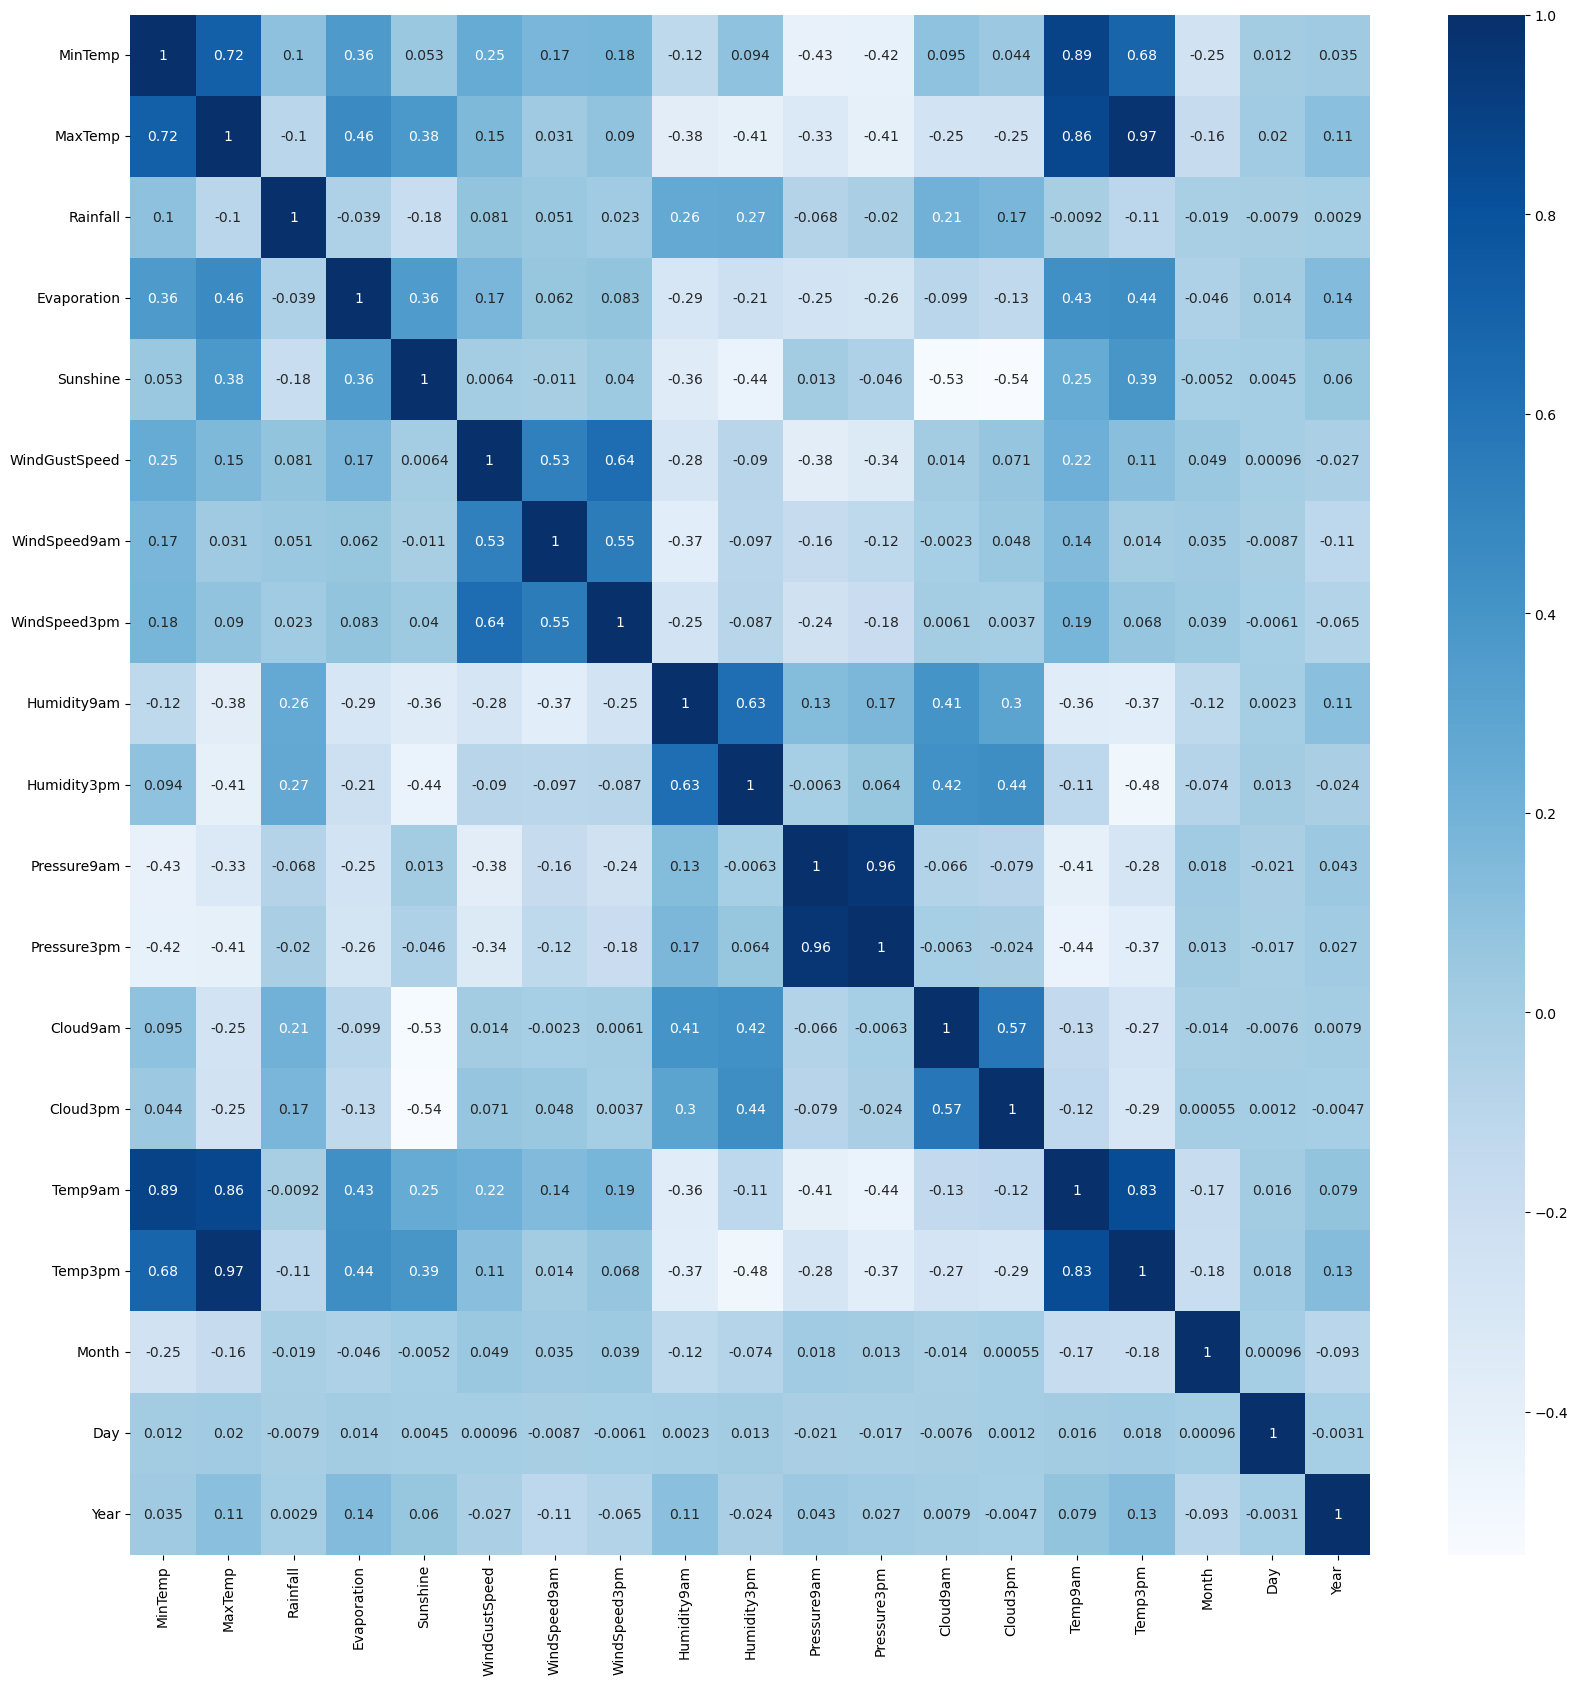

In [212]:
plt.figure(figsize=(20,20))
sns.heatmap(df1_new.cor,annot=True,cmap='Blues')

In [213]:
loss1=(df1.shape[0]-df1_new.shape[0])/df1.shape[0]

In [214]:
loss1*100

3.335311572700297

In [215]:
from sklearn.preprocessing import LabelEncoder

In [216]:
le=LabelEncoder()
for i in df1_new.columns:
    if df1_new[i].dtypes=='object':
        df1_new[i]=le.fit_transform(df1_new[i])

In [217]:
df1_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,2008-12-01,1,13.4,22.900000,0.6,1.753261,7.632205,13,3.530348,13,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.100000,0.0,1.753261,7.632205,14,3.530348,6,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.700000,0.0,1.753261,7.632205,15,3.583048,13,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.000000,0.0,1.753261,7.632205,4,2.884499,9,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.300000,1.0,1.753261,7.632205,13,3.448217,1,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,1.753261,7.632205,0,3.141381,9,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,6,21,2017
8421,2017-06-22,9,3.6,25.300000,0.0,1.753261,7.632205,6,2.802039,9,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,6,22,2017
8422,2017-06-23,9,5.4,26.900000,0.0,1.753261,7.632205,3,3.332222,9,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,6,23,2017
8423,2017-06-24,9,7.8,27.000000,0.0,1.753261,7.632205,9,3.036589,10,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,6,24,2017


In [218]:
x1=df1_new.drop(['Rainfall','Date'],axis=1)

In [219]:
y1=df1_new['Rainfall']

In [220]:
x1.shape

(8144, 24)

In [221]:
y1.shape

(8144,)

In [222]:
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [223]:
vif=pd.DataFrame()

In [224]:
vif['Values']=[variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,Values,Features
0,1.586739,Location
1,8.656813,MinTemp
2,25.650480,MaxTemp
3,1.506872,Evaporation
4,1.959938,Sunshine
5,1.617475,WindGustDir
6,2.354327,WindGustSpeed
7,1.382741,WindDir9am
8,1.493571,WindDir3pm
9,1.945563,WindSpeed9am


In [225]:
x1=x1.drop('Temp3pm',axis=1)

In [226]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,Values,Features
0,1.585874,Location
1,8.618061,MinTemp
2,9.549611,MaxTemp
3,1.505121,Evaporation
4,1.959752,Sunshine
5,1.614068,WindGustDir
6,2.344145,WindGustSpeed
7,1.382187,WindDir9am
8,1.492349,WindDir3pm
9,1.945563,WindSpeed9am


In [227]:
x1=x1.drop('Pressure3pm',axis=1)

In [228]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,Values,Features
0,1.585226,Location
1,8.513471,MinTemp
2,9.095543,MaxTemp
3,1.496576,Evaporation
4,1.956809,Sunshine
5,1.605555,WindGustDir
6,2.339753,WindGustSpeed
7,1.356073,WindDir9am
8,1.437793,WindDir3pm
9,1.942533,WindSpeed9am


In [229]:
x1=x1.drop('Temp9am',axis=1)

In [230]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,Values,Features
0,1.583385,Location
1,4.533988,MinTemp
2,5.263105,MaxTemp
3,1.490690,Evaporation
4,1.950202,Sunshine
5,1.604114,WindGustDir
6,2.295180,WindGustSpeed
7,1.356053,WindDir9am
8,1.437122,WindDir3pm
9,1.929592,WindSpeed9am


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

In [232]:
MaxAcc=0
MaxRS=0
for i in range(1,200): 
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x1_train,y1_train)
    pred=LR.predict(x1_test)
    acc=r2_score(y1_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS=i

In [233]:
print('MaxAcc=',MaxAcc,'MaxRS=',MaxRS)

MaxAcc= 0.3882323807188839 MaxRS= 97


In [234]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=MaxRS)

In [235]:
LR=LinearRegression()
LR.fit(x1_train,y1_train)
predLR=LR.predict(x1_test)
print('r2_score=',r2_score(y1_test,predLR))
print('Mean absolute error=',mean_absolute_error(y1_test,predLR))
print('Mean Squared Error=',mean_absolute_error(y1_test,predLR))
print('RMSE=',np.sqrt(mean_squared_error(y1_test,predLR)))

r2_score= 0.3882323807188839
Mean absolute error= 2.5352742054488835
Mean Squared Error= 2.5352742054488835
RMSE= 5.664981917225677


In [236]:
ETC=ExtraTreeRegressor()
ETC.fit(x1_train,y1_train)
predETC=ETC.predict(x1_test)
print('r2 score=',r2_score(y1_test,predETC))
print('Mean Absolute Error=',mean_absolute_error(y1_test,predETC))
print('Mean squared Error=',mean_squared_error(y1_test,predETC))
print('RMSE=',np.sqrt(mean_squared_error(y1_test,predETC)))

r2 score= -0.17415056936187168
Mean Absolute Error= 2.0303004378093736
Mean squared Error= 61.59342618211371
RMSE= 7.848147945987876


In [237]:
DTR=DecisionTreeRegressor()
DTR.fit(x1_train,y1_train)
predDTR=DTR.predict(x1_test)
print('r2 score=',r2_score(y1_test,predDTR))
print('Mean Absolute Error=',mean_absolute_error(y1_test,predDTR))
print('Mean squared error=',mean_squared_error(y1_test,predDTR))
print('RMSE=',np.sqrt(mean_squared_error(y1_test,predDTR)))

r2 score= 0.18597252174633006
Mean Absolute Error= 1.6979306233609643
Mean squared error= 42.70213948733937
RMSE= 6.5346874054800335


In [238]:
LA=Lasso()
LA.fit(x1_train,y1_train)
predLA=LA.predict(x1_test)
print('r2 score=',r2_score(y1_test,predLA))
print('Mean absolute error=',mean_absolute_error(y1_test,predLA))
print('Mean squared error=',mean_squared_error(y1_test,predLA))
print('RMSE=',np.sqrt(mean_squared_error(y1_test,predLA)))

r2 score= 0.34584542493226156
Mean absolute error= 2.3301633986004378
Mean squared error= 34.31554911481619
RMSE= 5.85794751724665


In [239]:
RD=Ridge()
RD.fit(x1_train,y1_train)
predRD=RD.predict(x1_test)
print('r2 score=',r2_score(y1_test,predRD))
print('Mean absolute error=',mean_absolute_error(y1_test,predRD))
print('Mean squared error=',mean_squared_error(y1_test,predRD))
print('RMSE=',np.sqrt(mean_squared_error(y1_test,predRD)))

r2 score= 0.38823231487387866
Mean absolute error= 2.5351346621212834
Mean squared error= 32.09202357658197
RMSE= 5.664982222088784


In [240]:
knn=KNN()
knn.fit(x1_train,y1_train)
predknn=knn.predict(x1_test)
print('r2 score=',r2_score(y1_test,predknn))
print('Mean absolute error=',mean_absolute_error(y1_test,predknn))
print('Mean Squared Error=',mean_squared_error(y1_test,predknn))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,predknn)))

r2 score= 0.302017767076351
Mean absolute error= 2.064381648998657
Mean Squared Error= 36.614654254585524
RMSE: 6.051004400476463


In [241]:
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)
predRFR=RFR.predict(x1_test)
print('r2 score:',r2_score(y1_test,predRFR))
print('Mean Absolute Error:',mean_absolute_error(y1_test,predRFR))
print('Mean Squared Error:',mean_squared_error(y1_test,predRFR))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,predRFR)))

r2 score: 0.5598244787322698
Mean Absolute Error: 1.6423443861620644
Mean Squared Error: 23.090665868443235
RMSE: 4.805274796350697


In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
scoreLR=cross_val_score(LR,x1,y1,cv=5)
print(scoreLR)
print(scoreLR.mean())
print('Difference Between cross val score and r2 score:',(r2_score(y1_test,predLR)-(scoreLR.mean())))

[0.28584396 0.30823565 0.3385675  0.30917067 0.34676744]
0.3177170439895251
Difference Between cross val score and r2 score: 0.07051533672935878


In [244]:
scoreETC=cross_val_score(ETC,x1,y1,cv=5)
print(scoreETC)
print(scoreETC.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predETC)-(scoreETC.mean())))

[-0.1175591   0.31641118  0.47443952 -1.42337444 -0.34150941]
-0.21831845017315513
Difference between cv score and r2 score: 0.04416788081128345


In [245]:
scoreDTR=cross_val_score(DTR,x1,y1,cv=5)
print(scoreDTR)
print(scoreDTR.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predDTR)-(scoreDTR.mean())))

[-0.01231867  0.2343922   0.4927642  -0.38469983 -0.33752257]
-0.0014769342243966753
Difference between cv score and r2 score: 0.18744945597072674


In [246]:
scoreLA=cross_val_score(LA,x1,y1,cv=5)
print(scoreLA)
print(scoreLA.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predLA)-(scoreLA.mean())))

[0.23194085 0.28763768 0.3081565  0.33369834 0.30683994]
0.29365465998539664
Difference between cv score and r2 score: 0.05219076494686492


In [247]:
scoreRD=cross_val_score(RD,x1,y1,cv=5)
print(scoreRD)
print(scoreRD.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predRD)-(scoreRD.mean())))

[0.28583555 0.30823774 0.33856557 0.3092021  0.34676752]
0.31772169596323857
Difference between cv score and r2 score: 0.07051061891064009


In [248]:
scoreknn=cross_val_score(knn,x1,y1,cv=5)
print(scoreknn)
print(scoreknn.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predknn)-(scoreknn.mean())))

[0.23388391 0.27603515 0.35993317 0.1745094  0.32689639]
0.27425160305407603
Difference between cv score and r2 score: 0.027766164022274942


In [249]:
scoreRFR=cross_val_score(RFR,x1,y1,cv=5)
print(scoreRFR)
print(scoreRFR.mean())
print('Difference between cv score and r2 score:',(r2_score(y1_test,predRFR)-(scoreRFR.mean())))

[0.33779159 0.45643656 0.62311224 0.39431467 0.42801733]
0.4479344796796741
Difference between cv score and r2 score: 0.11188999905259572


In [250]:
#We are selecting RFR as our model becuase Accuracy is high among all and difference between cv score and r2 score is lowest

In [251]:
parameters={'n_estimators':[1,9,10,23],
           'max_depth':[2,10,23,4],
           'bootstrap':[True],
           'n_jobs':[1,4,10,12],
           'random_state':[1,5,9,10]}

In [252]:
from sklearn.model_selection import GridSearchCV

In [253]:
gscv=GridSearchCV(RFR,parameters,cv=5)
gscv.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [2, 10, 23, 4],
                         'n_estimators': [1, 9, 10, 23],
                         'n_jobs': [1, 4, 10, 12],
                         'random_state': [1, 5, 9, 10]})

In [254]:
gscv.best_params_

{'bootstrap': True,
 'max_depth': 23,
 'n_estimators': 23,
 'n_jobs': 1,
 'random_state': 9}

In [255]:
Model=RandomForestRegressor(bootstrap=True,max_depth=23,n_estimators=23,n_jobs=1,random_state=9)

In [256]:
Model.fit(x1_train,y1_train)
predM=Model.predict(x1_test)
print('r2 score:',r2_score(y1_test,predM))
print('Mean absolute Error:',mean_absolute_error(y1_test,predM))
print('Mean Squared Error:',mean_squared_error(y1_test,predM))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,predM)))

r2 score: 0.5278713280068037
Mean absolute Error: 1.6765252537133613
Mean Squared Error: 24.766859775639123
RMSE: 4.976631368269015


In [257]:
import joblib

In [258]:
joblib.dump(Model,'Rainfall')

['Rainfall']

In [259]:
model=joblib.load('Rainfall')

In [260]:
loaded_model=joblib.load('Rainfall')
y1_pred=loaded_model.predict(x1_test)
test_score=r2_score(y1_test,y1_pred)
print('Test_r2_score:',test_score*100)

Test_r2_score: 52.78713280068037


In [261]:
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],y1_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443
Predicted,0.078261,1.707947,0.313558,27.026087,0.022087,0.043478,0.0,0.167039,0.000135,0.0,...,0.078408,18.286957,2.439925,0.000753,0.081907,0.090721,0.003265,0.046865,0.148083,9.617391
Original,0.000000,2.805913,0.000000,34.200000,0.000000,0.000000,0.0,0.000000,0.200000,0.0,...,0.000000,9.200000,2.805913,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,10.000000
